In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [0]:
# step :02 Load the data
cars_data= pd.read_csv("https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Car_pricing_prediction/CarPrice_Assignment.csv")

In [3]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
#Split the CarName column to CarCompany and CarModel and join them to car_df dataframe
cars_data = cars_data.join(cars_data['CarName'].str.split(' ', 1, expand=True).rename(columns={0:'CarCompany', 1:'CarModel'}))
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [6]:
#Remove the starting and leading whitespaces for string objects

#Get the column names of string types
str_cols = cars_data.select_dtypes(['object'])

#Strip the leading and trailing whitespaces if any
cars_data[str_cols.columns] = str_cols.apply(lambda x: x.str.strip())
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [7]:
#Convert all string columns data to uppercase
cars_data[str_cols.columns] = str_cols.apply(lambda x: x.str.upper())
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,1,3,ALFA-ROMERO GIULIA,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,64.1,48.8,2548,DOHC,FOUR,130,MPFI,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,GIULIA
1,2,3,ALFA-ROMERO STELVIO,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,168.8,64.1,48.8,2548,DOHC,FOUR,130,MPFI,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,STELVIO
2,3,1,ALFA-ROMERO QUADRIFOGLIO,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,171.2,65.5,52.4,2823,OHCV,SIX,152,MPFI,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,QUADRIFOGLIO
3,4,2,AUDI 100 LS,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,176.6,66.2,54.3,2337,OHC,FOUR,109,MPFI,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,100 LS
4,5,2,AUDI 100LS,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,176.6,66.4,54.3,2824,OHC,FIVE,136,MPFI,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS


In [8]:
#Get the unique Car companies
cars_data['CarCompany'].unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE',
       'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA',
       'VOKSWAGEN', 'VOLKSWAGEN', 'VW', 'VOLVO'], dtype=object)

In [0]:
#Replace the improper company names with proper company names
cars_data.loc[(cars_data['CarCompany']=='MAXDA'),['CarCompany']] = 'MAZDA'
cars_data.loc[(cars_data['CarCompany']=='PORCSHCE'),['CarCompany']] = 'PORSCHE'
cars_data.loc[(cars_data['CarCompany']=='TOYOUTA'),['CarCompany']] = 'TOYOTA'
cars_data.loc[((cars_data['CarCompany']=='VOKSWAGEN') | (cars_data['CarCompany']=='VW')),['CarCompany']] = 'VOLKSWAGEN'

In [10]:
#Get the unique Car companies again and verify if all the data is handled properly
cars_data['CarCompany'].unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI',
       'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'RENAULT', 'SAAB',
       'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [11]:
#Drop the CarName column
cars_data=cars_data.drop(['CarName'], axis=1)
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

In [12]:
#Get the observations of symboling column

print(cars_data['symboling'].unique())
print(cars_data['symboling'].value_counts())
cars_data['symboling'].describe()

[ 3  1  2  0 -1 -2]
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

In [13]:
#Get the observations of fueltype column
print(cars_data['fueltype'].unique())
print(cars_data['fueltype'].value_counts())
cars_data['fueltype'].describe()

['GAS' 'DIESEL']
GAS       185
DIESEL     20
Name: fueltype, dtype: int64


count     205
unique      2
top       GAS
freq      185
Name: fueltype, dtype: object

In [0]:
cars_data['fueltype'] = cars_data['fueltype'].map({'GAS': 1, 'DIESEL': 0})

In [15]:
print(cars_data['fueltype'].unique())
print(cars_data['fueltype'].value_counts())
cars_data['fueltype'].describe()

[1 0]
1    185
0     20
Name: fueltype, dtype: int64


count    205.000000
mean       0.902439
std        0.297446
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: fueltype, dtype: float64

In [16]:
print(cars_data['aspiration'].unique())
print(cars_data['aspiration'].value_counts())
cars_data['aspiration'].describe()

['STD' 'TURBO']
STD      168
TURBO     37
Name: aspiration, dtype: int64


count     205
unique      2
top       STD
freq      168
Name: aspiration, dtype: object

In [0]:
cars_data['aspiration'] = cars_data['aspiration'].map({'STD' : 1, 'TURBO': 0})

In [18]:
print(cars_data['aspiration'].unique())
print(cars_data['aspiration'].value_counts())
cars_data['aspiration'].describe()

[1 0]
1    168
0     37
Name: aspiration, dtype: int64


count    205.000000
mean       0.819512
std        0.385535
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: aspiration, dtype: float64

In [19]:
print(cars_data['doornumber'].unique())
print(cars_data['doornumber'].value_counts())
cars_data['doornumber'].describe()

['TWO' 'FOUR']
FOUR    115
TWO      90
Name: doornumber, dtype: int64


count      205
unique       2
top       FOUR
freq       115
Name: doornumber, dtype: object

In [0]:
cars_data['doornumber'] = cars_data['doornumber'].map({'FOUR': 4, 'TWO': 2})

In [21]:
print(cars_data['doornumber'].unique())
print(cars_data['doornumber'].value_counts())
cars_data['doornumber'].describe()

[2 4]
4    115
2     90
Name: doornumber, dtype: int64


count    205.000000
mean       3.121951
std        0.994966
min        2.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: doornumber, dtype: float64

In [22]:
print(cars_data['carbody'].unique())
print(cars_data['carbody'].value_counts())
cars_data['carbody'].describe()

['CONVERTIBLE' 'HATCHBACK' 'SEDAN' 'WAGON' 'HARDTOP']
SEDAN          96
HATCHBACK      70
WAGON          25
HARDTOP         8
CONVERTIBLE     6
Name: carbody, dtype: int64


count       205
unique        5
top       SEDAN
freq         96
Name: carbody, dtype: object

In [23]:
print(cars_data['drivewheel'].unique())
print(cars_data['drivewheel'].value_counts())
cars_data['drivewheel'].describe()

['RWD' 'FWD' '4WD']
FWD    120
RWD     76
4WD      9
Name: drivewheel, dtype: int64


count     205
unique      3
top       FWD
freq      120
Name: drivewheel, dtype: object

In [24]:
print(cars_data['enginelocation'].unique())
print(cars_data['enginelocation'].value_counts())
cars_data['enginelocation'].describe()

['FRONT' 'REAR']
FRONT    202
REAR       3
Name: enginelocation, dtype: int64


count       205
unique        2
top       FRONT
freq        202
Name: enginelocation, dtype: object

In [0]:
cars_data['enginelocation'] = cars_data['enginelocation'].map({'FRONT': 1, 'REAR': 0})

In [26]:
print(cars_data['enginelocation'].unique())
print(cars_data['enginelocation'].value_counts())
cars_data['enginelocation'].describe()

[1 0]
1    202
0      3
Name: enginelocation, dtype: int64


count    205.000000
mean       0.985366
std        0.120377
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: enginelocation, dtype: float64

In [27]:
print(cars_data['enginetype'].unique())
print(cars_data['enginetype'].value_counts())
cars_data['enginetype'].describe()

['DOHC' 'OHCV' 'OHC' 'L' 'ROTOR' 'OHCF' 'DOHCV']
OHC      148
OHCF      15
OHCV      13
L         12
DOHC      12
ROTOR      4
DOHCV      1
Name: enginetype, dtype: int64


count     205
unique      7
top       OHC
freq      148
Name: enginetype, dtype: object

In [28]:
print(cars_data['cylindernumber'].unique())
print(cars_data['cylindernumber'].value_counts())
cars_data['cylindernumber'].describe()

['FOUR' 'SIX' 'FIVE' 'THREE' 'TWELVE' 'TWO' 'EIGHT']
FOUR      159
SIX        24
FIVE       11
EIGHT       5
TWO         4
TWELVE      1
THREE       1
Name: cylindernumber, dtype: int64


count      205
unique       7
top       FOUR
freq       159
Name: cylindernumber, dtype: object

In [0]:
cars_data['cylindernumber'] = cars_data['cylindernumber'].map({'FOUR': 4, 'SIX': 6, 'FIVE': 5, 'THREE':3, 'TWELVE':12, 'TWO':2, 'EIGHT':8})

In [30]:
print(cars_data['cylindernumber'].unique())
print(cars_data['cylindernumber'].value_counts())
cars_data['cylindernumber'].describe()

[ 4  6  5  3 12  2  8]
4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64


count    205.000000
mean       4.380488
std        1.080854
min        2.000000
25%        4.000000
50%        4.000000
75%        4.000000
max       12.000000
Name: cylindernumber, dtype: float64

In [31]:
print(cars_data['fuelsystem'].unique())
print(cars_data['fuelsystem'].value_counts())
cars_data['fuelsystem'].describe()

['MPFI' '2BBL' 'MFI' '1BBL' 'SPFI' '4BBL' 'IDI' 'SPDI']
MPFI    94
2BBL    66
IDI     20
1BBL    11
SPDI     9
4BBL     3
SPFI     1
MFI      1
Name: fuelsystem, dtype: int64


count      205
unique       8
top       MPFI
freq        94
Name: fuelsystem, dtype: object

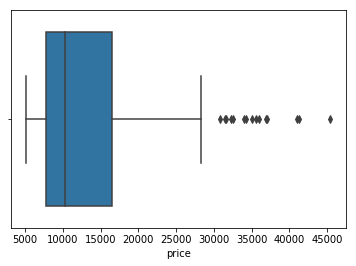

In [32]:
sns.boxplot(x=cars_data['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


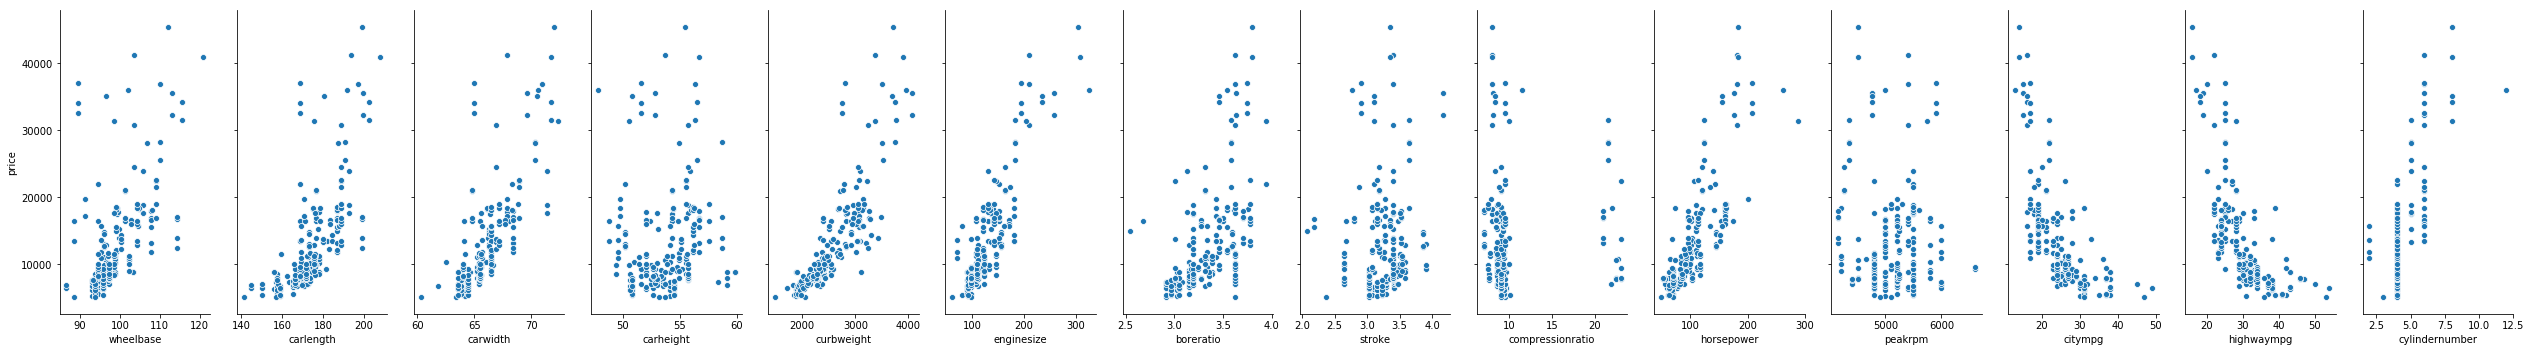

In [33]:
sns.pairplot(cars_data, x_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower',
'peakrpm',  'citympg', 'highwaympg','cylindernumber'], y_vars='price', size=5, aspect=0.5,kind='scatter')


In [34]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg            

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


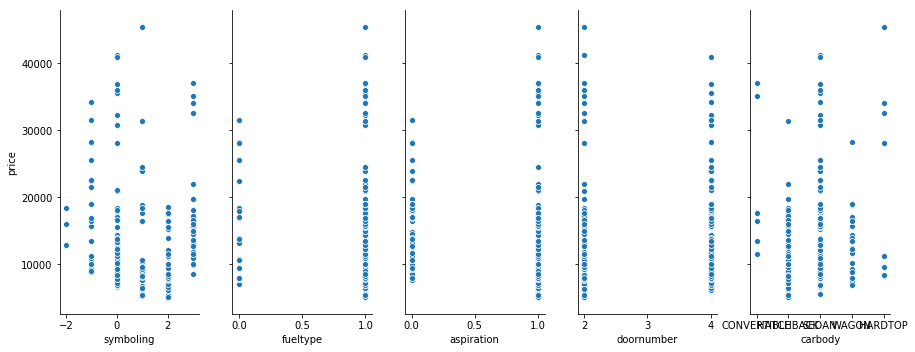

In [35]:
sns.pairplot(cars_data, x_vars=['symboling','fueltype','aspiration','doornumber','carbody'], y_vars='price', size=5, aspect=0.5,kind='scatter')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


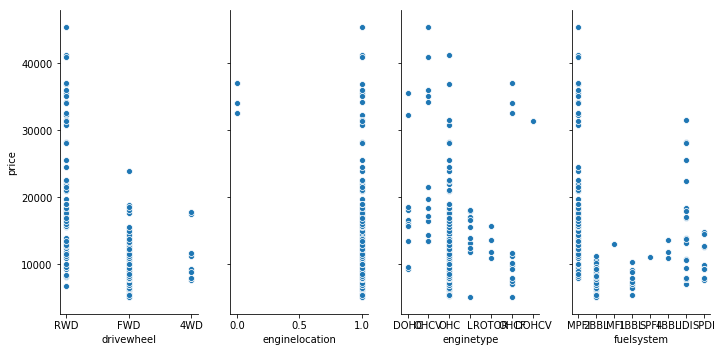

In [36]:
sns.pairplot(cars_data, x_vars=['drivewheel','enginelocation','enginetype','fuelsystem'], y_vars='price', size=5, aspect=0.5,kind='scatter')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


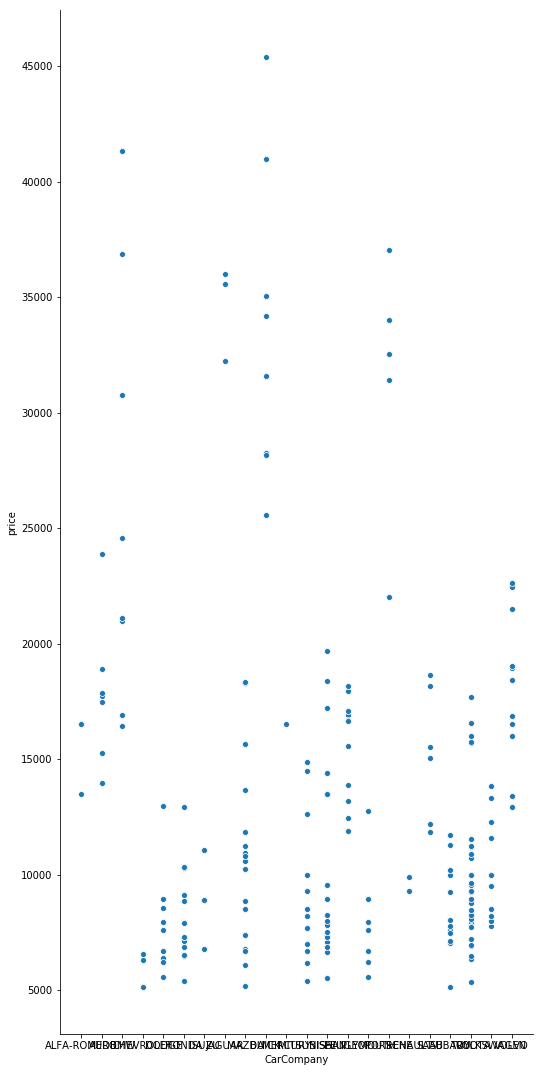

In [37]:
sns.pairplot(cars_data, x_vars=['CarCompany'], y_vars='price', size=15, aspect=0.5,kind='scatter')

In [0]:
cars_data['area_car'] = cars_data['carlength'] * cars_data['carwidth']

In [0]:
cars_data['volume_car'] = cars_data['carlength'] * cars_data['carwidth']*cars_data['carheight']

In [0]:
cars_data['weight_to_volume ratio'] = cars_data['curbweight'] / cars_data['volume_car']

In [0]:
cars_data['enginesize_to_powerratio'] = cars_data['horsepower'] / cars_data['enginesize']

In [0]:
cars_data['avg_milage'] = (cars_data['citympg']+cars_data['highwaympg'])/2

In [43]:
cars_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel,area_car,volume_car,weight_to_volume ratio,enginesize_to_powerratio,avg_milage
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,GIULIA,10820.08,528019.904,0.004826,0.853846,24.0
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,STELVIO,10820.08,528019.904,0.004826,0.853846,24.0
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,65.5,52.4,2823,OHCV,6,152,MPFI,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,QUADRIFOGLIO,11213.60,587592.640,0.004804,1.013158,22.5
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,66.2,54.3,2337,OHC,4,109,MPFI,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,100 LS,11690.92,634816.956,0.003681,0.935780,27.0
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,66.4,54.3,2824,OHC,5,136,MPFI,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS,11726.24,636734.832,0.004435,0.845588,20.0


In [44]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 32 columns):
car_ID                      205 non-null int64
symboling                   205 non-null int64
fueltype                    205 non-null int64
aspiration                  205 non-null int64
doornumber                  205 non-null int64
carbody                     205 non-null object
drivewheel                  205 non-null object
enginelocation              205 non-null int64
wheelbase                   205 non-null float64
carlength                   205 non-null float64
carwidth                    205 non-null float64
carheight                   205 non-null float64
curbweight                  205 non-null int64
enginetype                  205 non-null object
cylindernumber              205 non-null int64
enginesize                  205 non-null int64
fuelsystem                  205 non-null object
boreratio                   205 non-null float64
stroke                      205 non

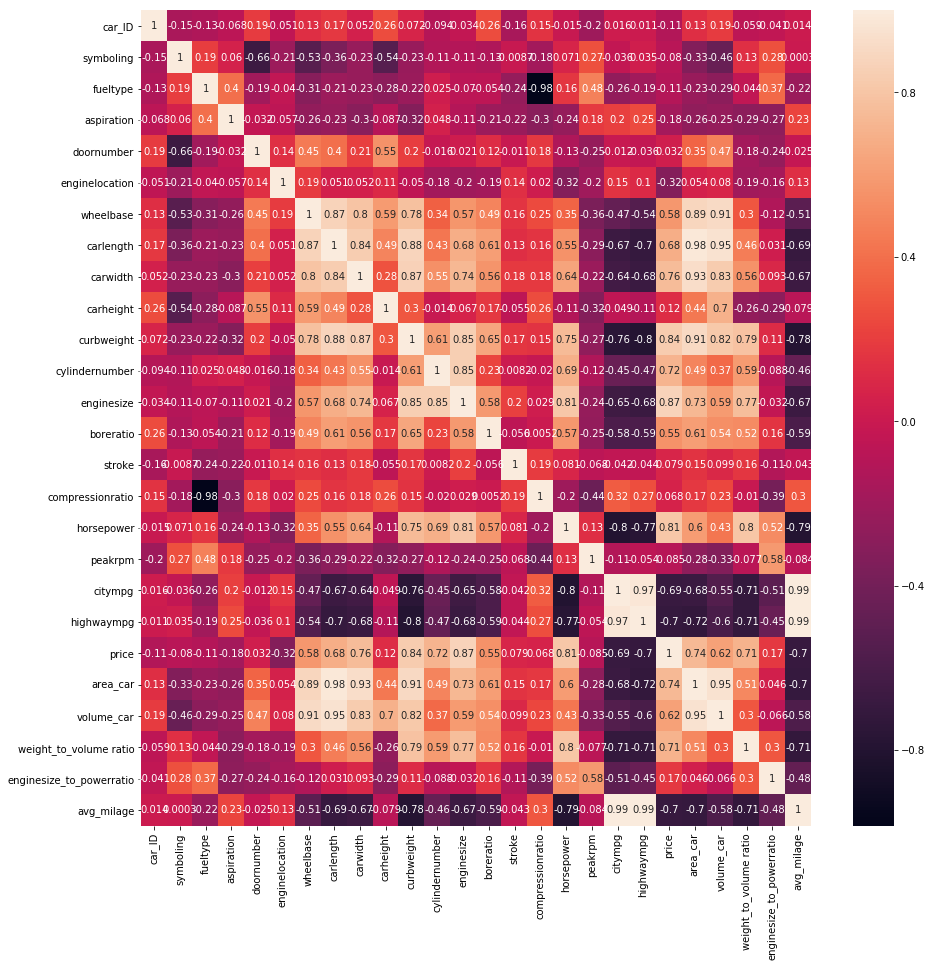

In [45]:
plt.figure(figsize = (15,15))

sns.heatmap(cars_data.corr(),annot = True)

In [0]:
symboling = pd.get_dummies(cars_data['symboling'],drop_first=True,prefix='symboling')
#Adding the results to the master dataframe
cars_data = pd.concat([cars_data,symboling],axis=1)

In [47]:
cars_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel,area_car,volume_car,weight_to_volume ratio,enginesize_to_powerratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,GIULIA,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,STELVIO,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,65.5,52.4,2823,OHCV,6,152,MPFI,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,QUADRIFOGLIO,11213.60,587592.640,0.004804,1.013158,22.5,0,0,1,0,0
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,66.2,54.3,2337,OHC,4,109,MPFI,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,100 LS,11690.92,634816.956,0.003681,0.935780,27.0,0,0,0,1,0
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,66.4,54.3,2824,OHC,5,136,MPFI,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS,11726.24,636734.832,0.004435,0.845588,20.0,0,0,0,1,0


In [48]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
car_ID                      205 non-null int64
symboling                   205 non-null int64
fueltype                    205 non-null int64
aspiration                  205 non-null int64
doornumber                  205 non-null int64
carbody                     205 non-null object
drivewheel                  205 non-null object
enginelocation              205 non-null int64
wheelbase                   205 non-null float64
carlength                   205 non-null float64
carwidth                    205 non-null float64
carheight                   205 non-null float64
curbweight                  205 non-null int64
enginetype                  205 non-null object
cylindernumber              205 non-null int64
enginesize                  205 non-null int64
fuelsystem                  205 non-null object
boreratio                   205 non-null float64
stroke                      205 non

In [49]:
carbody = pd.get_dummies(cars_data['carbody'],drop_first=True,prefix='carbody')
#Adding the results to the master dataframe
cars_data = pd.concat([cars_data,carbody],axis=1)
cars_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel,area_car,volume_car,weight_to_volume ratio,enginesize_to_powerratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,GIULIA,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,STELVIO,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,65.5,52.4,2823,OHCV,6,152,MPFI,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,QUADRIFOGLIO,11213.60,587592.640,0.004804,1.013158,22.5,0,0,1,0,0,0,1,0,0
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,66.2,54.3,2337,OHC,4,109,MPFI,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,100 LS,11690.92,634816.956,0.003681,0.935780,27.0,0,0,0,1,0,0,0,1,0
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,66.4,54.3,2824,OHC,5,136,MPFI,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS,11726.24,636734.832,0.004435,0.845588,20.0,0,0,0,1,0,0,0,1,0


In [50]:
drivewheel = pd.get_dummies(cars_data['drivewheel'],drop_first=True,prefix='drivewheel')
#Adding the results to the master dataframe
cars_data = pd.concat([cars_data,drivewheel],axis=1)
cars_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel,area_car,volume_car,weight_to_volume ratio,enginesize_to_powerratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,GIULIA,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,STELVIO,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,65.5,52.4,2823,OHCV,6,152,MPFI,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,QUADRIFOGLIO,11213.60,587592.640,0.004804,1.013158,22.5,0,0,1,0,0,0,1,0,0,0,1
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,66.2,54.3,2337,OHC,4,109,MPFI,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,100 LS,11690.92,634816.956,0.003681,0.935780,27.0,0,0,0,1,0,0,0,1,0,1,0
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,66.4,54.3,2824,OHC,5,136,MPFI,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS,11726.24,636734.832,0.004435,0.845588,20.0,0,0,0,1,0,0,0,1,0,0,0


In [51]:
enginetype = pd.get_dummies(cars_data['enginetype'],drop_first=True,prefix='enginetype')
#Adding the results to the master dataframe
cars_data = pd.concat([cars_data,enginetype],axis=1)
cars_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel,area_car,volume_car,weight_to_volume ratio,enginesize_to_powerratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD,enginetype_DOHCV,enginetype_L,enginetype_OHC,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,GIULIA,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,STELVIO,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,65.5,52.4,2823,OHCV,6,152,MPFI,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,QUADRIFOGLIO,11213.60,587592.640,0.004804,1.013158,22.5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,66.2,54.3,2337,OHC,4,109,MPFI,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,100 LS,11690.92,634816.956,0.003681,0.935780,27.0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,66.4,54.3,2824,OHC,5,136,MPFI,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS,11726.24,636734.832,0.004435,0.845588,20.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [52]:
fuelsystem = pd.get_dummies(cars_data['fuelsystem'],drop_first=True,prefix='fuelsystem')
#Adding the results to the master dataframe
cars_data = pd.concat([cars_data,fuelsystem],axis=1)
cars_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel,area_car,volume_car,weight_to_volume ratio,enginesize_to_powerratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD,enginetype_DOHCV,enginetype_L,enginetype_OHC,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,GIULIA,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,STELVIO,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,65.5,52.4,2823,OHCV,6,152,MPFI,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,QUADRIFOGLIO,11213.60,587592.640,0.004804,1.013158,22.5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,66.2,54.3,2337,OHC,4,109,MPFI,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,100 LS,11690.92,634816.956,0.003681,0.935780,27.0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,66.4,54.3,2824,OHC,5,136,MPFI,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS,11726.24,636734.832,0.004435,0.845588,20.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [53]:
CarCompany = pd.get_dummies(cars_data['CarCompany'],drop_first=True,prefix='CarCompany')
#Adding the results to the master dataframe
cars_data = pd.concat([cars_data,CarCompany],axis=1)
cars_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel,area_car,volume_car,weight_to_volume ratio,enginesize_to_powerratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD,enginetype_DOHCV,enginetype_L,enginetype_OHC,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,CarCompany_AUDI,CarCompany_BMW,CarCompany_BUICK,CarCompany_CHEVROLET,CarCompany_DODGE,CarCompany_HONDA,CarCompany_ISUZU,CarCompany_JAGUAR,CarCompany_MAZDA,CarCompany_MERCURY,CarCompany_MITSUBISHI,CarCompany_NISSAN,CarCompany_PEUGEOT,CarCompany_PLYMOUTH,CarCompany_PORSCHE,CarCompany_RENAULT,CarCompany_SAAB,CarCompany_SUBARU,CarCompany_TOYOTA,CarCompany_VOLKSWAGEN,CarCompany_VOLVO
0,1,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,GIULIA,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,2,CONVERTIBLE,RWD,1,88.6,168.8,64.1,48.8,2548,DOHC,4,130,MPFI,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,STELVIO,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,2,HATCHBACK,RWD,1,94.5,171.2,65.5,52.4,2823,OHCV,6,152,MPFI,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,QUADRIFOGLIO,11213.60,587592.640,0.004804,1.013158,22.5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,1,1,4,SEDAN,FWD,1,99.8,176.6,66.2,54.3,2337,OHC,4,109,MPFI,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,100 LS,11690.92,634816.956,0.003681,0.935780,27.0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,1,1,4,SEDAN,4WD,1,99.4,176.6,66.4,54.3,2824,OHC,5,136,MPFI,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS,11726.24,636734.832,0.004435,0.845588,20.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
cars_data = cars_data.drop(['symboling','carbody','drivewheel','enginetype','fuelsystem','CarCompany'],axis=1)

In [55]:
cars_data.head()

,car_ID,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarModel,area_car,volume_car,weight_to_volume ratio,enginesize_to_powerratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD,enginetype_DOHCV,enginetype_L,enginetype_OHC,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,CarCompany_AUDI,CarCompany_BMW,CarCompany_BUICK,CarCompany_CHEVROLET,CarCompany_DODGE,CarCompany_HONDA,CarCompany_ISUZU,CarCompany_JAGUAR,CarCompany_MAZDA,CarCompany_MERCURY,CarCompany_MITSUBISHI,CarCompany_NISSAN,CarCompany_PEUGEOT,CarCompany_PLYMOUTH,CarCompany_PORSCHE,CarCompany_RENAULT,CarCompany_SAAB,CarCompany_SUBARU,CarCompany_TOYOTA,CarCompany_VOLKSWAGEN,CarCompany_VOLVO
0,1,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,GIULIA,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,STELVIO,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,QUADRIFOGLIO,11213.60,587592.640,0.004804,1.013158,22.5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,100 LS,11690.92,634816.956,0.003681,0.935780,27.0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,1,4,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,100LS,11726.24,636734.832,0.004435,0.845588,20.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 71 columns):
car_ID                      205 non-null int64
fueltype                    205 non-null int64
aspiration                  205 non-null int64
doornumber                  205 non-null int64
enginelocation              205 non-null int64
wheelbase                   205 non-null float64
carlength                   205 non-null float64
carwidth                    205 non-null float64
carheight                   205 non-null float64
curbweight                  205 non-null int64
cylindernumber              205 non-null int64
enginesize                  205 non-null int64
boreratio                   205 non-null float64
stroke                      205 non-null float64
compressionratio            205 non-null float64
horsepower                  205 non-null int64
peakrpm                     205 non-null int64
citympg                     205 non-null int64
highwaympg                  205 non

In [0]:
cars_data = cars_data.drop('CarModel', axis=1)

In [0]:
cars_data = cars_data.drop('car_ID', axis=1)

In [0]:
features = cars_data.columns.tolist()

In [0]:
features.remove('price')

In [0]:
features.remove('weight_to_volume ratio')

In [0]:
features.remove('enginesize')

In [0]:
# Putting feature variable to X
X = cars_data[features]

# Putting response variable to y|
y = cars_data['price']

In [64]:
cars_data.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,area_car,volume_car,weight_to_volume ratio,enginesize_to_powerratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD,enginetype_DOHCV,enginetype_L,enginetype_OHC,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,CarCompany_AUDI,CarCompany_BMW,CarCompany_BUICK,CarCompany_CHEVROLET,CarCompany_DODGE,CarCompany_HONDA,CarCompany_ISUZU,CarCompany_JAGUAR,CarCompany_MAZDA,CarCompany_MERCURY,CarCompany_MITSUBISHI,CarCompany_NISSAN,CarCompany_PEUGEOT,CarCompany_PLYMOUTH,CarCompany_PORSCHE,CarCompany_RENAULT,CarCompany_SAAB,CarCompany_SUBARU,CarCompany_TOYOTA,CarCompany_VOLKSWAGEN,CarCompany_VOLVO
0,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,11213.60,587592.640,0.004804,1.013158,22.5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,11690.92,634816.956,0.003681,0.935780,27.0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,4,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,11726.24,636734.832,0.004435,0.845588,20.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
cars_data.tail(5)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,area_car,volume_car,weight_to_volume ratio,enginesize_to_powerratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD,enginetype_DOHCV,enginetype_L,enginetype_OHC,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,CarCompany_AUDI,CarCompany_BMW,CarCompany_BUICK,CarCompany_CHEVROLET,CarCompany_DODGE,CarCompany_HONDA,CarCompany_ISUZU,CarCompany_JAGUAR,CarCompany_MAZDA,CarCompany_MERCURY,CarCompany_MITSUBISHI,CarCompany_NISSAN,CarCompany_PEUGEOT,CarCompany_PLYMOUTH,CarCompany_PORSCHE,CarCompany_RENAULT,CarCompany_SAAB,CarCompany_SUBARU,CarCompany_TOYOTA,CarCompany_VOLKSWAGEN,CarCompany_VOLVO
200,1,1,4,1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0,13008.32,721961.76,0.004089,0.808511,25.5,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,1,0,4,1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0,12989.44,720913.92,0.004229,1.134752,22.0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,1,1,4,1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0,13008.32,721961.76,0.004172,0.774566,20.5,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,0,0,4,1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0,13008.32,721961.76,0.004456,0.731034,26.5,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
204,1,0,4,1,109.1,188.8,68.9,55.5,3062,4,141,3.78,3.15,9.5,114,5400,19,25,22625.0,13008.32,721961.76,0.004241,0.808511,22.0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [66]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'area_car', 'volume_car',
       'enginesize_to_powerratio', 'avg_milage', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'carbody_HARDTOP',
       'carbody_HATCHBACK', 'carbody_SEDAN', 'carbody_WAGON', 'drivewheel_FWD',
       'drivewheel_RWD', 'enginetype_DOHCV', 'enginetype_L', 'enginetype_OHC',
       'enginetype_OHCF', 'enginetype_OHCV', 'enginetype_ROTOR',
       'fuelsystem_2BBL', 'fuelsystem_4BBL', 'fuelsystem_IDI',
       'fuelsystem_MFI', 'fuelsystem_MPFI', 'fuelsystem_SPDI',
       'fuelsystem_SPFI', 'CarCompany_AUDI', 'CarCompany_BMW',
       'CarCompany_BUICK', 'CarCompany_CHEVROLET', 'CarCompany_DODGE',
       'CarCompany_HONDA', 'CarCompany_ISUZU', 'CarCompany_JAGUAR',
       'C

In [0]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)
                                                    

In [68]:
# Building the first model with all the features

# instantiate
lm = LinearRegression()

# fit
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# print coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 4.54344264e+16 -8.24000000e+02  9.60000000e+01 -1.11800000e+03
  1.05400000e+03 -3.29520000e+04 -1.40990000e+04  3.62900000e+03
  2.07200000e+03 -1.24900000e+03 -1.46400000e+03  2.67000000e+02
 -3.04600000e+03  4.79200000e+03  1.03900000e+03  6.31000000e+02
 -2.09000000e+02  5.90560000e+04 -1.58990000e+04 -3.35800000e+03
  1.20000000e+02  6.58000000e+02  1.36300000e+03  9.98000000e+02
  9.19000000e+02  2.85000000e+02 -1.07600000e+03 -2.68200000e+03
 -2.34950000e+03 -1.28150000e+03 -4.12500000e+02 -2.42000000e+02
 -1.34000000e+02 -7.15000000e+01  2.74500000e+02  3.61000000e+02
  3.75000000e+01  1.76225000e+03  6.12500000e+02 -2.52250000e+02
  4.54344264e+16 -2.25000000e+00  6.77500000e+02  2.64000000e+02
  2.00000000e+00 -1.45000000e+02  1.88350000e+03  9.10000000e+02
 -4.58000000e+02 -9.79500000e+02 -6.88000000e+02 -3.17437500e+02
 -1.70000000e+02 -9.70000000e+01  1.25000000e+00 -1.31075000e+03
 -5.31750000e+02 -3.04000000e+02 -8.60000000e+02  1.35650000e+03
 -4.63000000e+02  1.09525

In [70]:
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

0.9043729562063949


In [71]:
# RFE with 25 features
from sklearn.feature_selection import RFE

# RFE with 25 features
lm = LinearRegression()
rfe_25 = RFE(lm, 25)

# fit with 25 features
rfe_25.fit(X_train, y_train)

# Printing the boolean results
print(rfe_25.support_)           
print(rfe_25.ranking_)

[ True False False  True False  True  True  True  True  True  True False
  True  True False  True  True  True  True  True False False False False
 False False False  True  True False False False False False False False
 False  True False False  True False False False False False  True  True
 False False False False False False False  True False False False  True
 False  True False False False  True]
[ 1 12 37  1  4  1  1  1  1  1  1 31  1  1 13  1  1  1  1  1 28 15  6  8
  7 27  3  1  1  2 17 29 30 38 26 25 39  1 21 14  1 40 22 23 41 35  1  1
 18  9 11 24 34 36 42  1 19  5 10  1 16  1 33 20 32  1]


In [72]:
# making predictions using rfe model
y_pred = rfe_25.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.9052181078675778


In [73]:
# import statsmodels
import statsmodels.api as sm  

# subset the features selected by rfe_50
col_25 = X_train.columns[rfe_25.support_]

# subsetting training data for 50 selected columns
X_train_rfe_25 = X_train[col_25]

# add a constant to the model
X_train_rfe_25 = sm.add_constant(X_train_rfe_25)
X_train_rfe_25.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,fueltype,enginelocation,carlength,carwidth,carheight,curbweight,cylindernumber,boreratio,compressionratio,horsepower,citympg,highwaympg,area_car,volume_car,enginesize_to_powerratio,carbody_HATCHBACK,carbody_SEDAN,enginetype_ROTOR,fuelsystem_IDI,CarCompany_BMW,CarCompany_BUICK,CarCompany_MITSUBISHI,CarCompany_PORSCHE,CarCompany_SAAB,CarCompany_VOLVO
122,1.0,0.328798,0.121867,-0.548402,-0.984972,-1.199923,-0.701886,-0.352887,-1.331531,-0.187398,-0.915571,0.885740,1.055193,-0.710480,-0.964982,-0.703939,-0.720082,1.065559,-0.141069,-0.328798,-0.201517,-0.201517,-0.260208,-0.158114,-0.17364,-0.238120
125,1.0,0.328798,0.121867,-0.418396,1.117866,-1.446071,0.428245,-0.352887,2.258638,-0.162161,0.985685,-0.953012,-0.546059,0.036852,-0.499799,0.683308,1.388730,-0.938474,-0.141069,-0.328798,-0.201517,-0.201517,-0.260208,6.324555,-0.17364,-0.238120
166,1.0,0.328798,0.121867,-0.434647,-0.891512,-0.461478,-0.492032,-0.352887,-0.332206,-0.187398,0.199833,0.119594,-0.254922,-0.603806,-0.640951,1.756518,1.388730,-0.938474,-0.141069,-0.328798,-0.201517,-0.201517,-0.260208,-0.158114,-0.17364,-0.238120
1,1.0,0.328798,0.121867,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.519071,-0.288349,0.174483,-0.646553,-0.546059,-0.583626,-1.144195,0.172706,-0.720082,-0.938474,-0.141069,-0.328798,-0.201517,-0.201517,-0.260208,-0.158114,-0.17364,-0.238120
199,1.0,0.328798,0.121867,1.198549,0.603839,1.548733,1.157921,-0.352887,1.074252,-0.666913,1.467337,-1.259470,-1.273900,1.035013,1.397819,2.322595,-0.720082,-0.938474,-0.141069,-0.328798,-0.201517,-0.201517,-0.260208,-0.158114,-0.17364,4.199567


In [74]:
# fitting the model with 25 variables
lm_25 = sm.OLS(y_train, X_train_rfe_25).fit()   
print(lm_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     114.6
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           2.42e-70
Time:                        04:50:24   Log-Likelihood:                -1256.0
No. Observations:                 143   AIC:                             2562.
Df Residuals:                     118   BIC:                             2636.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [75]:
# making predictions using rfe_25 sm model
X_test_rfe_25 = X_test[col_25]


# # Adding a constant variable 
X_test_rfe_25 = sm.add_constant(X_test_rfe_25, has_constant='add')
X_test_rfe_25.info()


# # Making predictions
y_pred = lm_25.predict(X_test_rfe_25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 26 columns):
const                       62 non-null float64
fueltype                    62 non-null float64
enginelocation              62 non-null float64
carlength                   62 non-null float64
carwidth                    62 non-null float64
carheight                   62 non-null float64
curbweight                  62 non-null float64
cylindernumber              62 non-null float64
boreratio                   62 non-null float64
compressionratio            62 non-null float64
horsepower                  62 non-null float64
citympg                     62 non-null float64
highwaympg                  62 non-null float64
area_car                    62 non-null float64
volume_car                  62 non-null float64
enginesize_to_powerratio    62 non-null float64
carbody_HATCHBACK           62 non-null float64
carbody_SEDAN               62 non-null float64
enginetype_ROTOR            62

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [76]:
# r-squared
r2_score(y_test, y_pred)

0.9052181078675776

In [77]:
# RFE with 15 features
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe_15 = RFE(lm, 15)

# fit with 10 features
rfe_15.fit(X_train, y_train)

# Printing the boolean results
print(rfe_15.support_)           
print(rfe_15.ranking_)

[False False False  True False  True  True  True  True False False False
 False  True False False False  True  True False False False False False
 False False False  True False False False False False False False False
 False False False False  True False False False False False  True  True
 False False False False False False False False False False False  True
 False  True False False False  True]
[ 3 22 47  1 14  1  1  1  1  6  5 41  2  1 23  9  8  1  1  7 38 25 16 18
 17 37 13  1 11 12 27 39 40 48 36 35 49 10 31 24  1 50 32 33 51 45  1  1
 28 19 21 34 44 46 52  4 29 15 20  1 26  1 43 30 42  1]


In [78]:
# making predictions using rfe model
y_pred = rfe_15.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.9134222579605964


In [79]:
# import statsmodels
import statsmodels.api as sm  

# subset the features selected by rfe_15
col_15= X_train.columns[rfe_15.support_]

# subsetting training data for 10 selected columns
X_train_rfe_15 = X_train[col_15]

# add a constant to the model
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,enginelocation,carlength,carwidth,carheight,curbweight,horsepower,area_car,volume_car,carbody_HATCHBACK,fuelsystem_IDI,CarCompany_BMW,CarCompany_BUICK,CarCompany_PORSCHE,CarCompany_SAAB,CarCompany_VOLVO
122,1.0,0.121867,-0.548402,-0.984972,-1.199923,-0.701886,-0.915571,-0.710480,-0.964982,-0.720082,-0.328798,-0.201517,-0.201517,-0.158114,-0.17364,-0.238120
125,1.0,0.121867,-0.418396,1.117866,-1.446071,0.428245,0.985685,0.036852,-0.499799,1.388730,-0.328798,-0.201517,-0.201517,6.324555,-0.17364,-0.238120
166,1.0,0.121867,-0.434647,-0.891512,-0.461478,-0.492032,0.199833,-0.603806,-0.640951,1.388730,-0.328798,-0.201517,-0.201517,-0.158114,-0.17364,-0.238120
1,1.0,0.121867,-0.426521,-0.844782,-2.020417,-0.014566,0.174483,-0.583626,-1.144195,-0.720082,-0.328798,-0.201517,-0.201517,-0.158114,-0.17364,-0.238120
199,1.0,0.121867,1.198549,0.603839,1.548733,1.157921,1.467337,1.035013,1.397819,-0.720082,-0.328798,-0.201517,-0.201517,-0.158114,-0.17364,4.199567


In [80]:
# fitting the model with 15 variables
lm_15 = sm.OLS(y_train, X_train_rfe_15).fit()   
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           3.74e-73
Time:                        04:50:24   Log-Likelihood:                -1274.4
No. Observations:                 143   AIC:                             2581.
Df Residuals:                     127   BIC:                             2628.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.323e+04    161

In [81]:
# r2_score for 15 variables
r2_score(y_test, y_pred)

0.9134222579605964

In [82]:
n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []
for n_features in range(4, 20):
    # RFE with n features
    lm = LinearRegression()

    # specify number of features
    rfe_n = RFE(lm, n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # subset the features selected by rfe_6
    col_n = X_train.columns[rfe_n.support_]

    # subsetting training data for 6 selected columns
    X_train_rfe_n = X_train[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)

    # fitting the model with 6 variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    # making predictions using rfe_15 sm model
    X_test_rfe_n = X_test[col_n]

    # # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    # # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    test_r2.append(r2_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be 

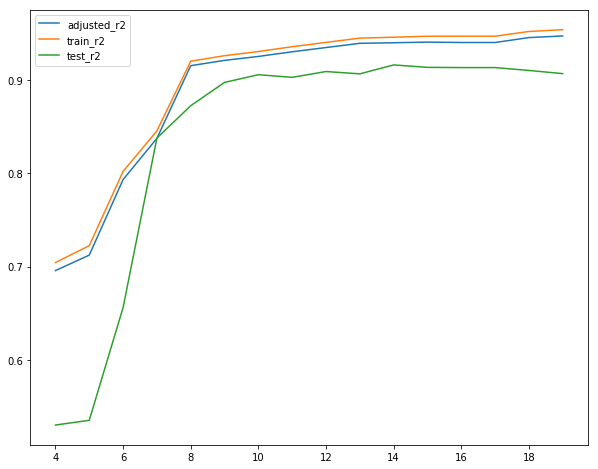

In [83]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

In [84]:
# RFE with n features
lm = LinearRegression()

n_features = 10

# specify number of features
rfe_n = RFE(lm, n_features)

# fit with n features
rfe_n.fit(X_train, y_train)

# subset the features selected by rfe_
col_n = X_train.columns[rfe_n.support_]

# subsetting training data for 8 selected columns
X_train_rfe_n = X_train[col_n]

# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)


# fitting the model with 8 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)


# making predictions using rfe_8 sm model
X_test_rfe_n = X_test[col_n]


# # Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)

test_r2.append(r2_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [85]:
# summary
lm_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     176.4
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           2.89e-71
Time:                        04:50:27   Log-Likelihood:                -1293.6
No. Observations:                 143   AIC:                             2609.
Df Residuals:                     132   BIC:                             2642.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.319e+04    180.641     73.039      0.000    1.28e+04    1.36e+04
enginelocation     -1853.3711    337.510     -5.491      0.000   -2521.000   -1185.742
carlength          -3.671e+04   5605.222     -6.548      0.000   -4.78e+04   -2.56e+04
carwidth           -1.521e+04   2801.370     -5.430      0.000   -2.08e+04   -9670.647
carheight           8206.6102   1993.989      4.116      0.000    4262.302    1.22e+04
curbweight          3996.0829    462.346      8.643      0.000    3081.517    4910.649
area_car             7.32e+04   1.05e+04      6.966      0.000    5.24e+04     9.4e+04
volume_car         -2.659e+04   5631.189     -4.721      0.000   -3.77e+04   -1.54e+04
CarCompany_BMW      2147.0989    179.803     11.941      0.000    1791.431    2502.766
CarCompany_BUICK     881.3579    236.023      3.734      0.000     414.480    1348.236
CarCompany_PORSCHE   820.7856    282.008      2.911      0.004     262.947    1378.625
==============================================================================
Omnibus:                       21.589   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.775
Skew:                           0.764   Prob(JB):                     4.63e-08
Kurtosis:                       4.826   Cond. No.                         162.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
r2_score(y_test, y_pred)

0.9055523807451721

In [87]:
# Use the linear regression (OLS) method on the test data
predictions_OLS = lm_n.predict(X_test_rfe_n)
# Calculate the absolute errors
errors_OLS = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error OLS:', round(np.mean(errors_OLS), 2), 'price.')

Mean Absolute Error OLS: 1863.34 price.


In [88]:
# Calculate mean absolute percentage error (MAPE)
mape_OLS = 100 * (errors_OLS / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape_OLS)
print('Accuracy OLS:', round(accuracy, 2), '%.')

Accuracy OLS: 86.37 %.


Text(0, 0.5, 'Car Price')

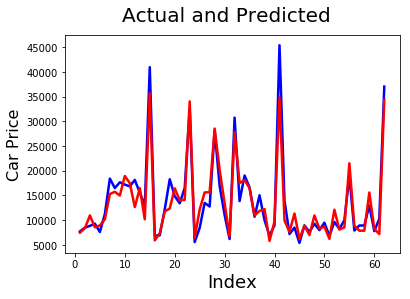

In [89]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

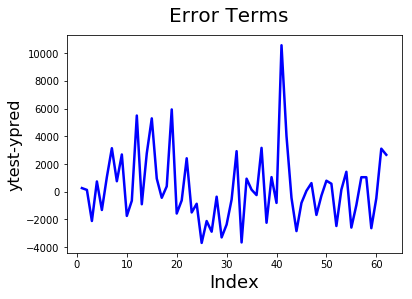

In [90]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)  

In [91]:
# sum of square of residuals
ssr = np.sum((y_pred - y_test)**2)
print(ssr)
#  total sum of squares
sst = np.sum((y_pred - np.mean(y_test))**2)
print (sst)
# R2 score
r2_score = 1 - (ssr/sst)
print(r2_score)

410073049.17604303
3386592593.1286097
0.8789127898029185


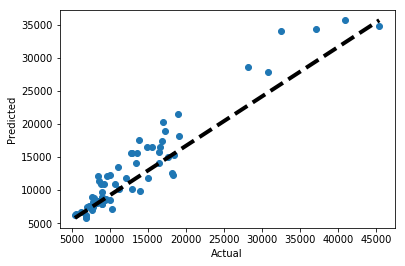

In [92]:
##ploting actual & predicted
fig,ax = plt.subplots()
ax.scatter(y_test,y_pred)
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
fig.show()

Text(0, 0.5, 'Index')

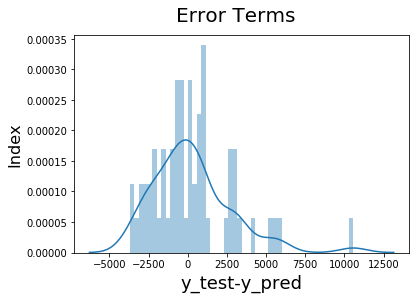

In [93]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [0]:
from sklearn.datasets import make_regression

In [0]:
n_samples = 100 # Number of samples
n_features = 6 # Number of features
n_informative = 3 # Number of informative features i.e. actual features which influence the output

In [0]:
X, y,coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                       random_state=None, shuffle=False,noise=20,coef=True)

In [97]:
df = cars_data
df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,area_car,volume_car,weight_to_volume ratio,enginesize_to_powerratio,avg_milage,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_HARDTOP,carbody_HATCHBACK,carbody_SEDAN,carbody_WAGON,drivewheel_FWD,drivewheel_RWD,enginetype_DOHCV,enginetype_L,enginetype_OHC,enginetype_OHCF,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,CarCompany_AUDI,CarCompany_BMW,CarCompany_BUICK,CarCompany_CHEVROLET,CarCompany_DODGE,CarCompany_HONDA,CarCompany_ISUZU,CarCompany_JAGUAR,CarCompany_MAZDA,CarCompany_MERCURY,CarCompany_MITSUBISHI,CarCompany_NISSAN,CarCompany_PEUGEOT,CarCompany_PLYMOUTH,CarCompany_PORSCHE,CarCompany_RENAULT,CarCompany_SAAB,CarCompany_SUBARU,CarCompany_TOYOTA,CarCompany_VOLKSWAGEN,CarCompany_VOLVO
0,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,10820.08,528019.904,0.004826,0.853846,24.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,11213.60,587592.640,0.004804,1.013158,22.5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,11690.92,634816.956,0.003681,0.935780,27.0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,4,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,11726.24,636734.832,0.004435,0.845588,20.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


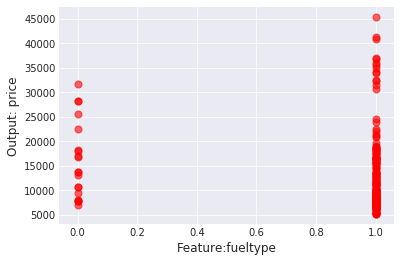

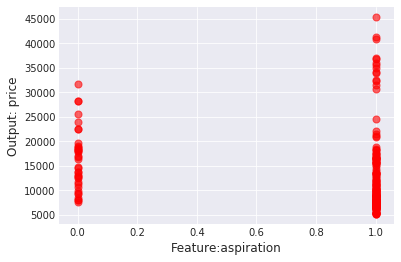

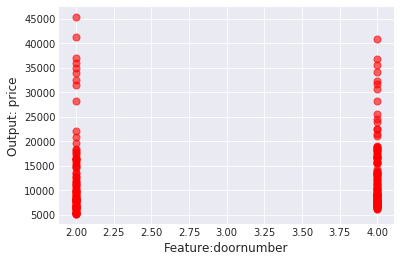

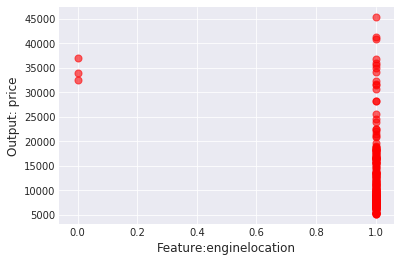

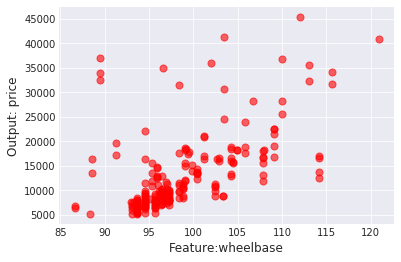

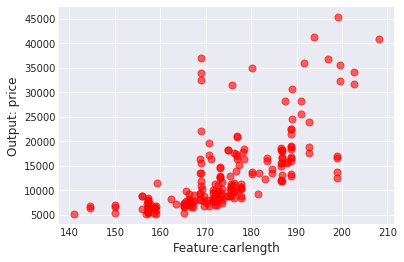

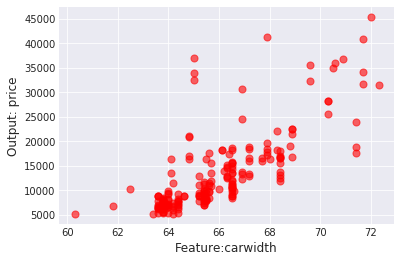

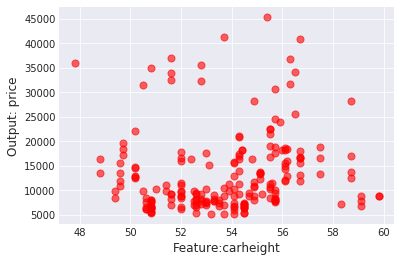

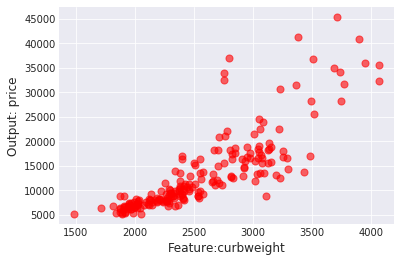

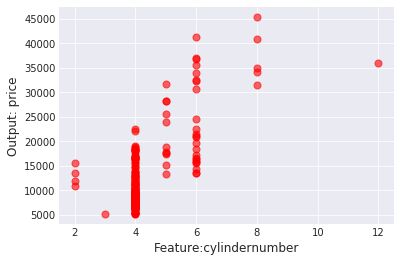

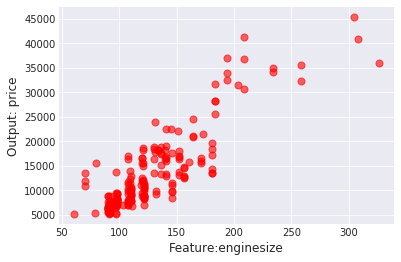

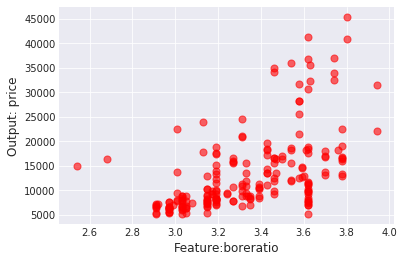

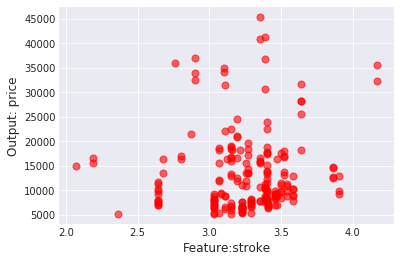

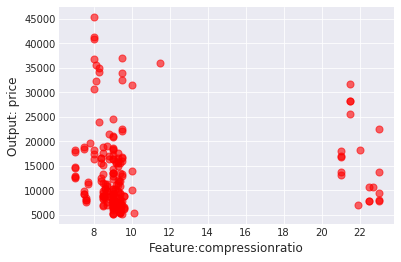

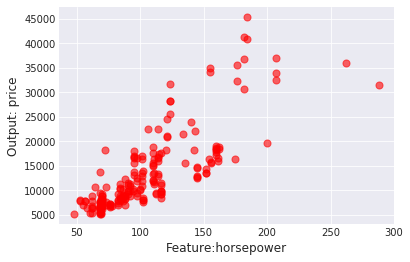

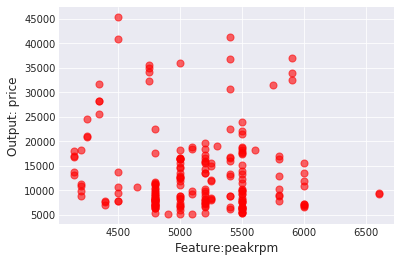

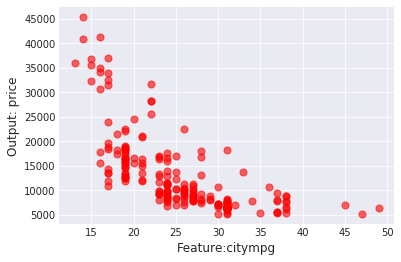

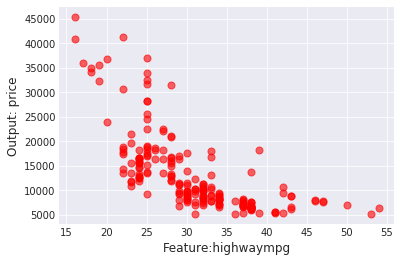

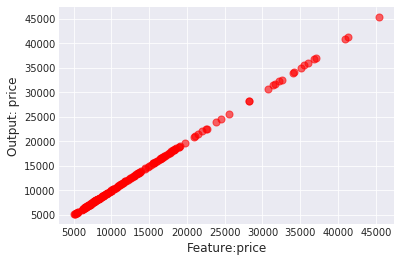

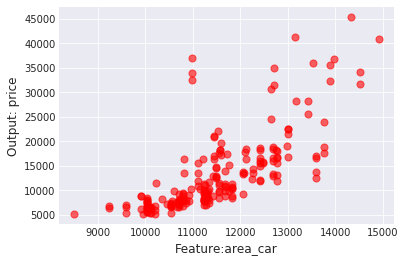

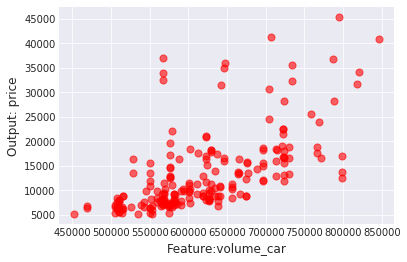

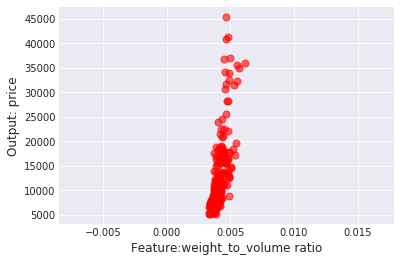

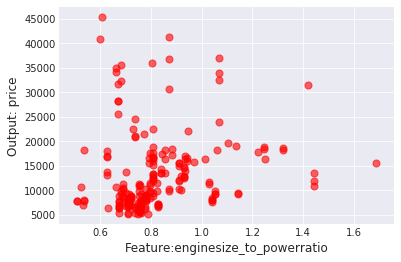

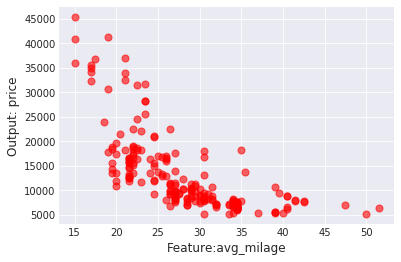

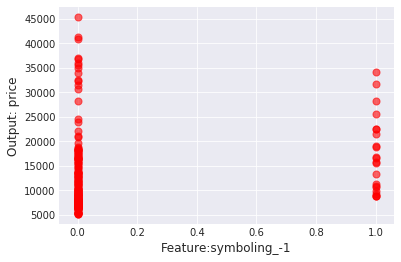

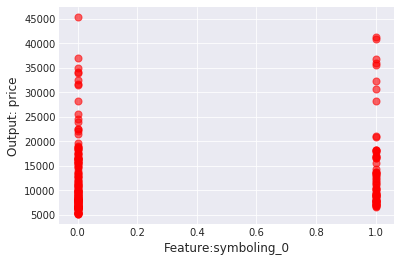

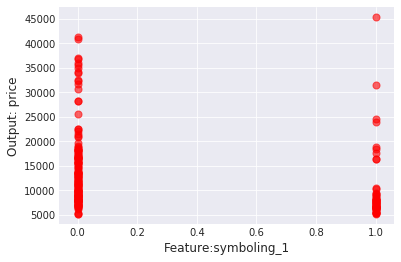

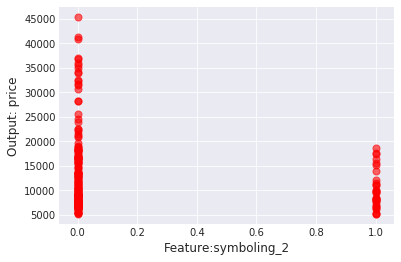

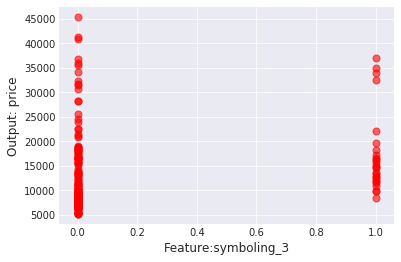

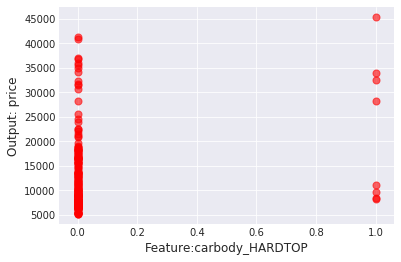

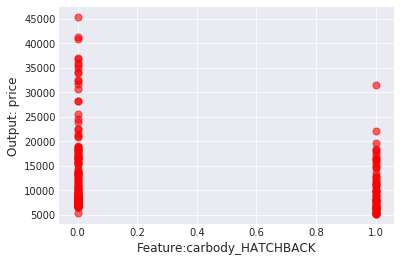

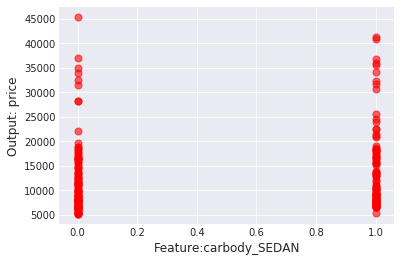

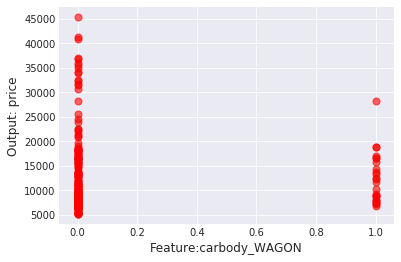

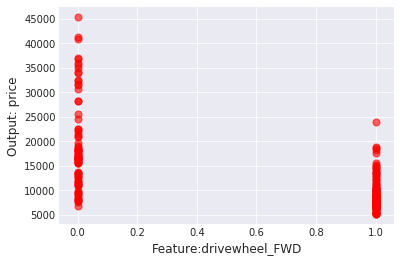

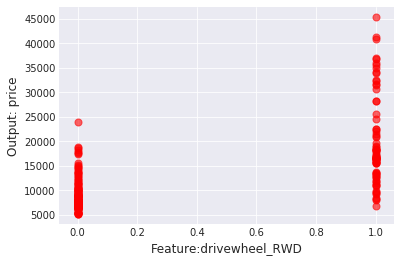

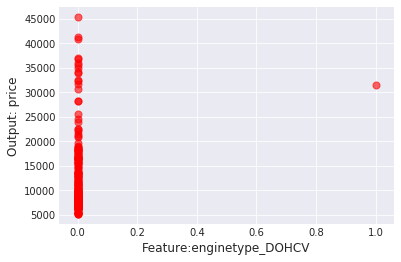

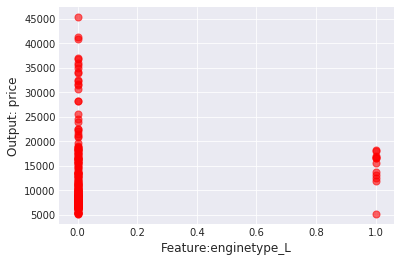

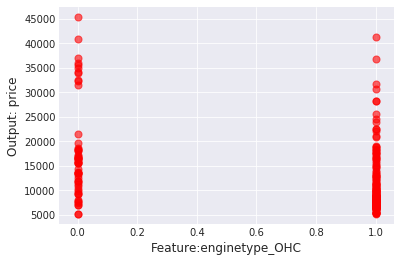

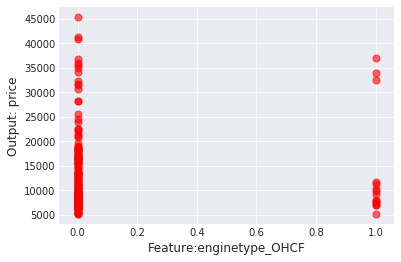

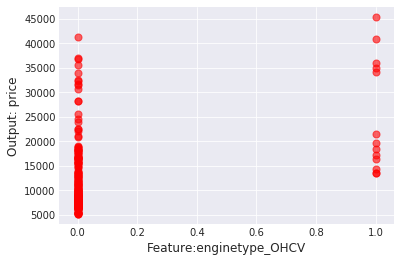

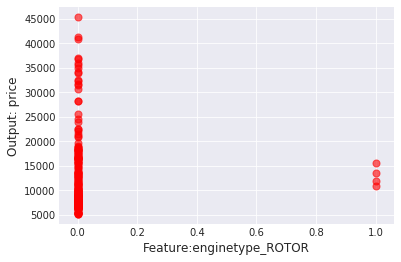

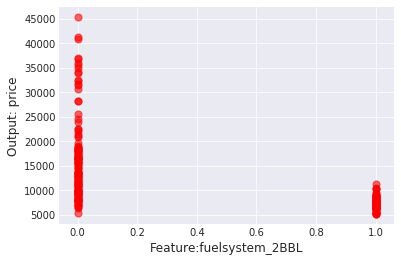

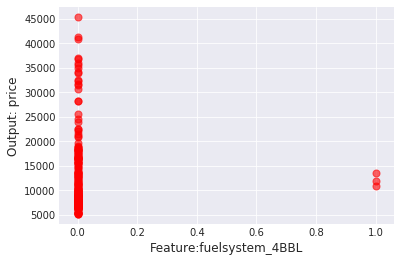

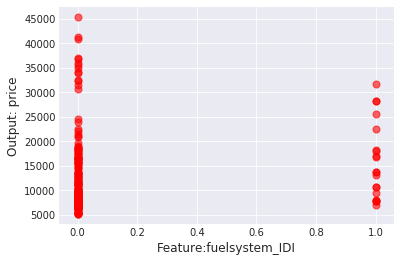

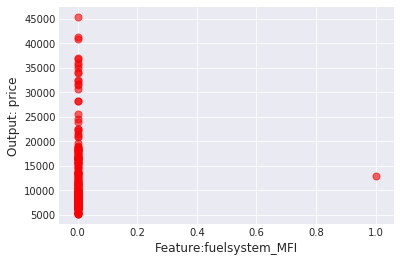

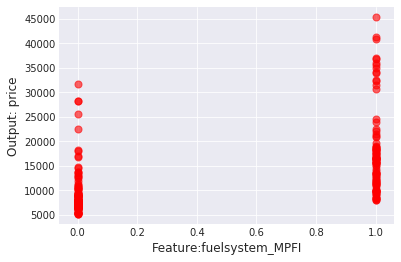

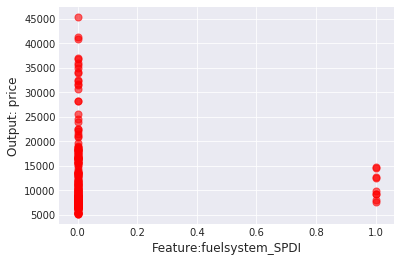

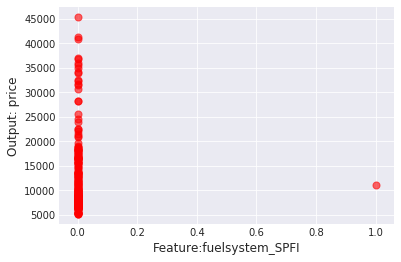

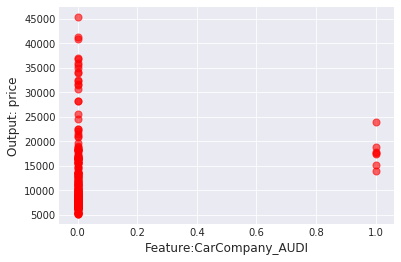

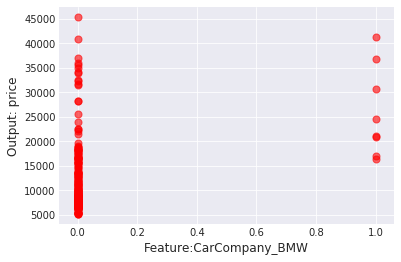

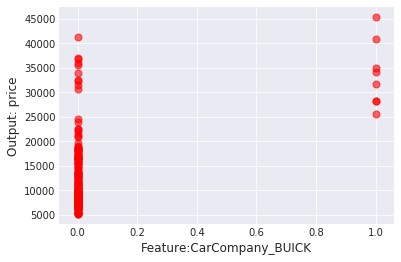

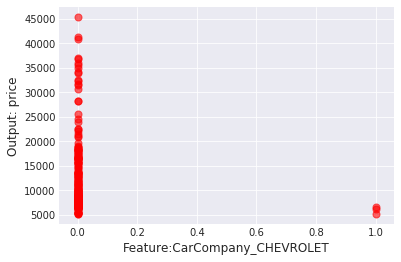

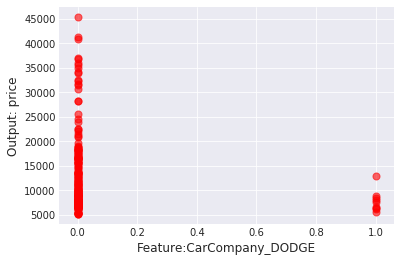

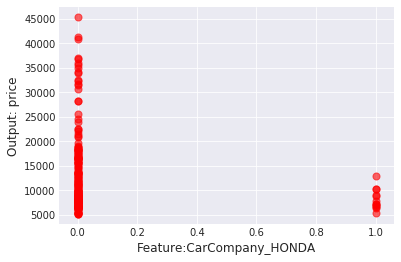

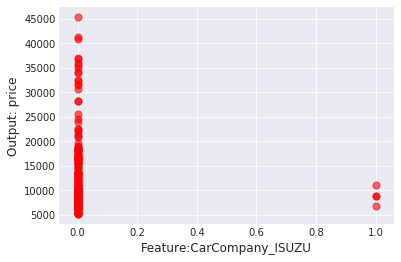

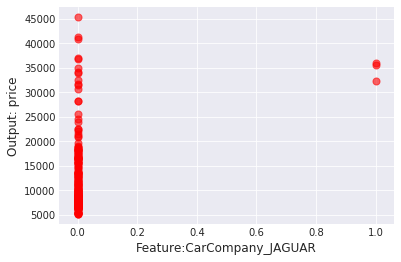

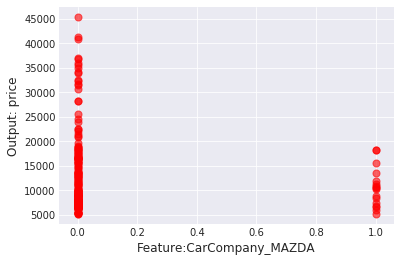

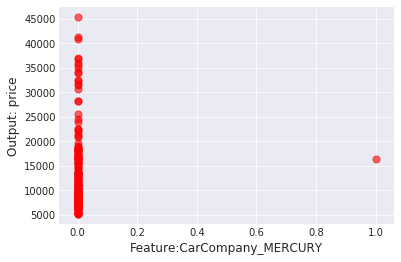

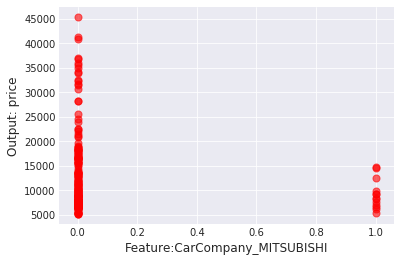

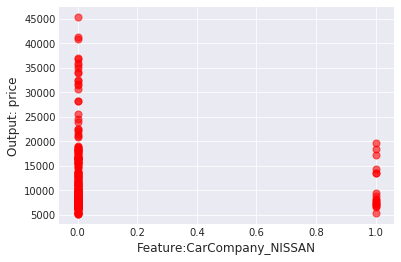

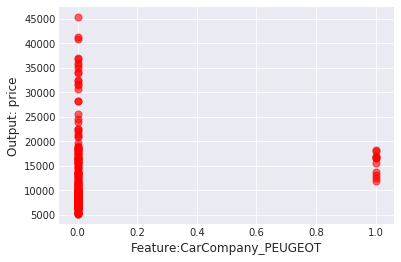

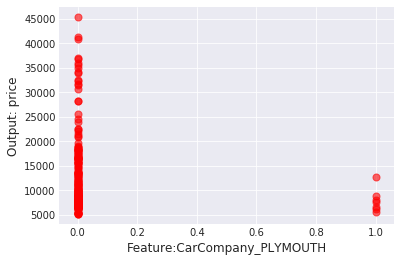

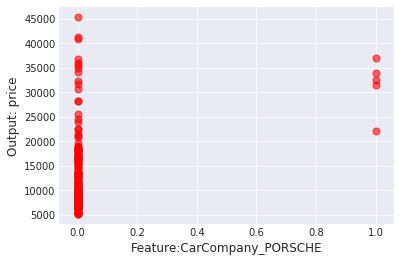

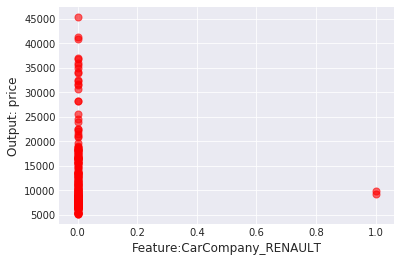

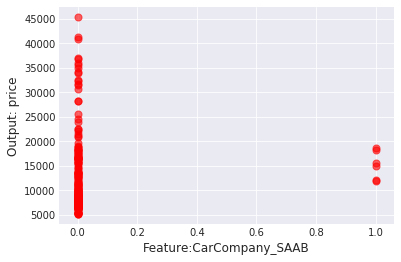

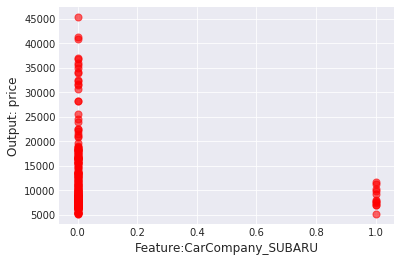

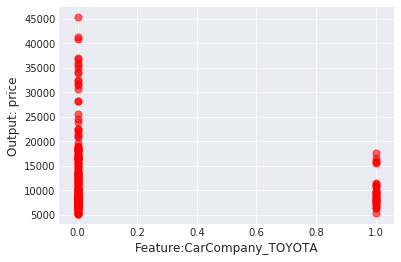

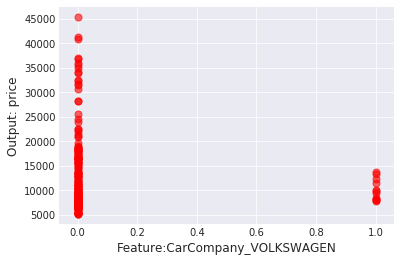

In [98]:
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: price',fontsize=12)
        plt.scatter(df[col],df['price'],c='red',s=50,alpha=0.6)

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


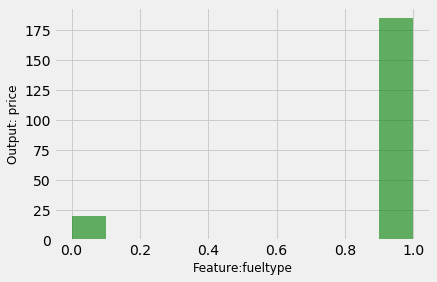

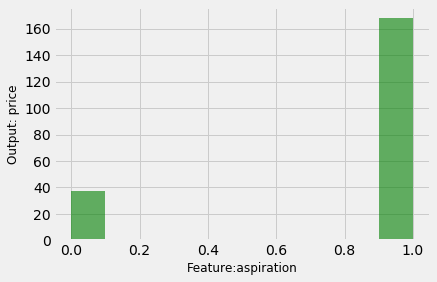

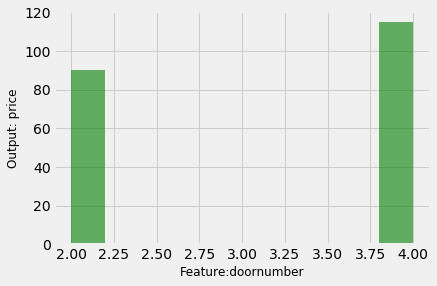

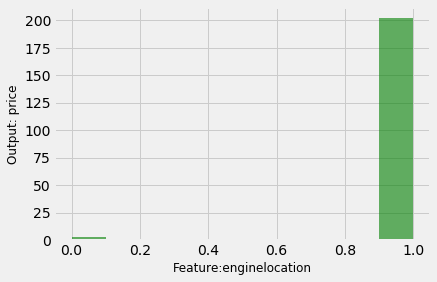

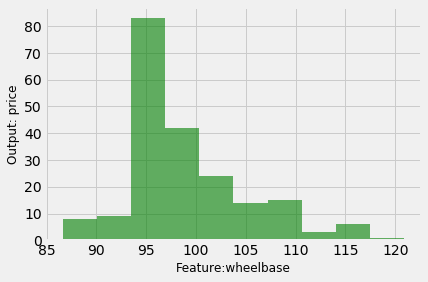

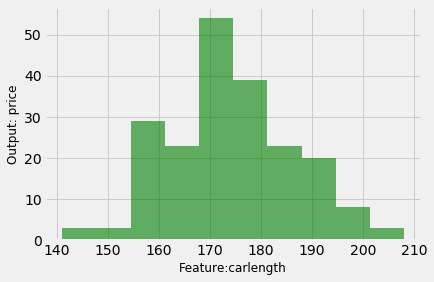

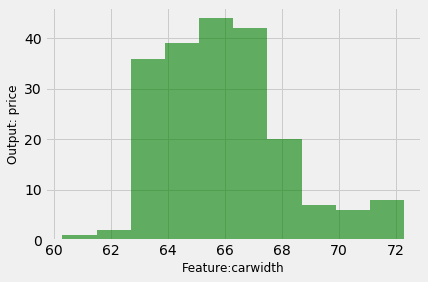

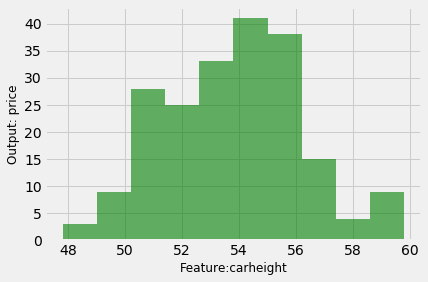

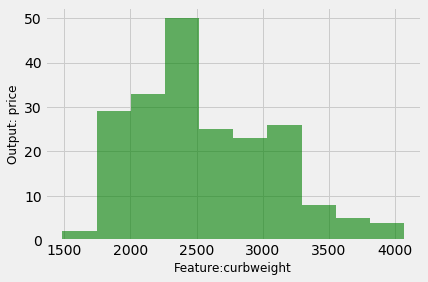

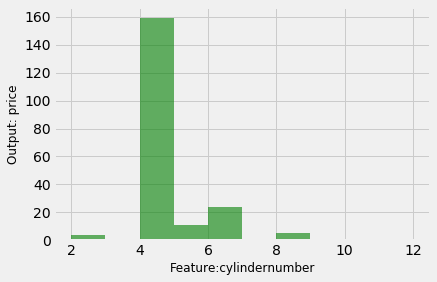

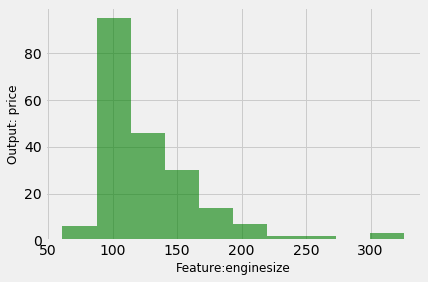

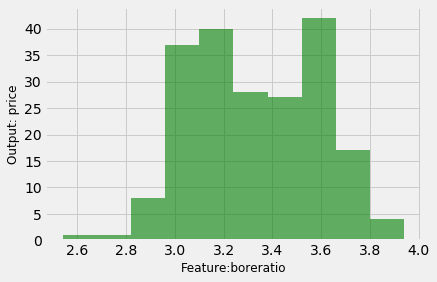

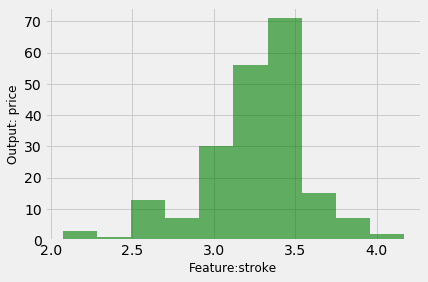

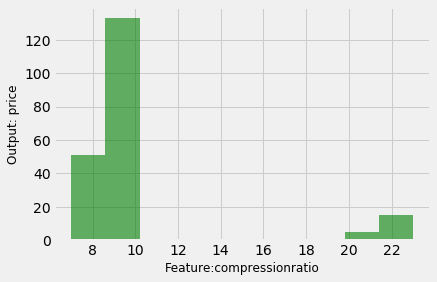

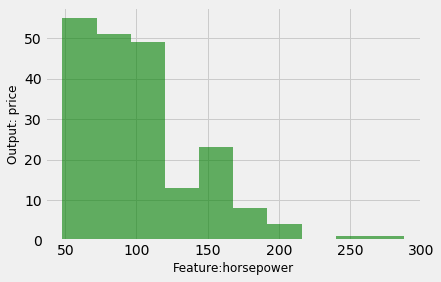

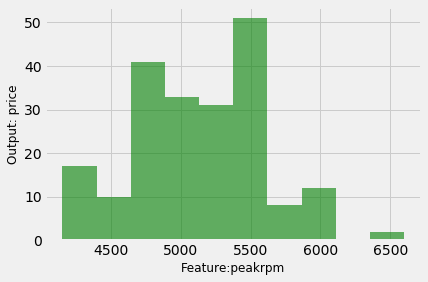

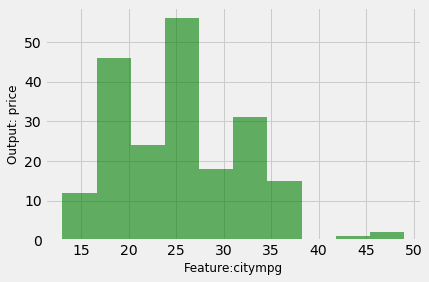

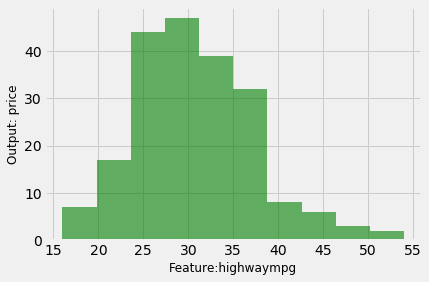

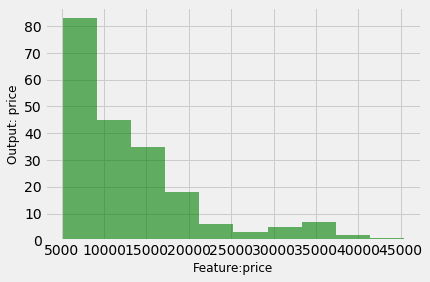

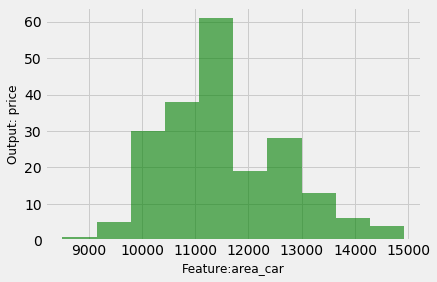

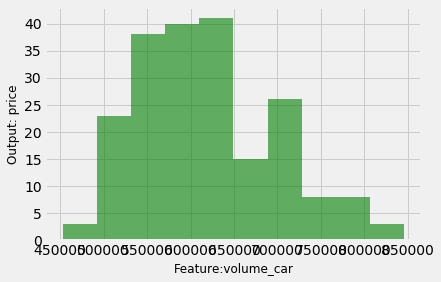

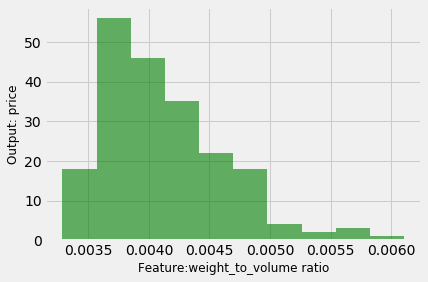

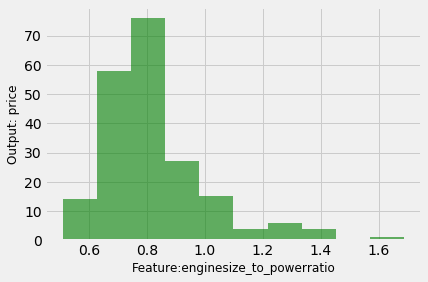

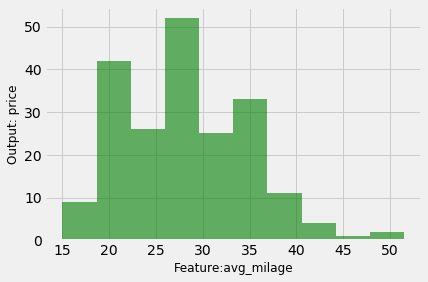

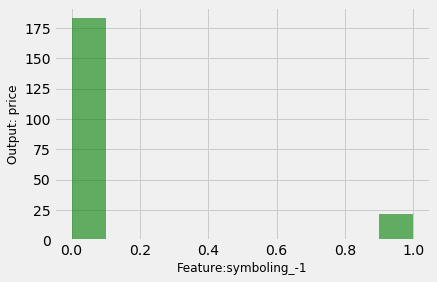

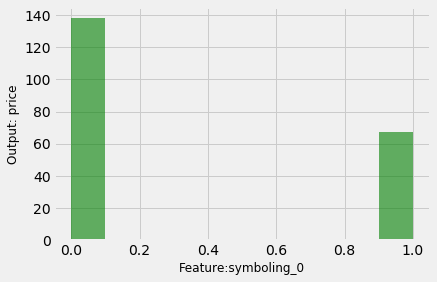

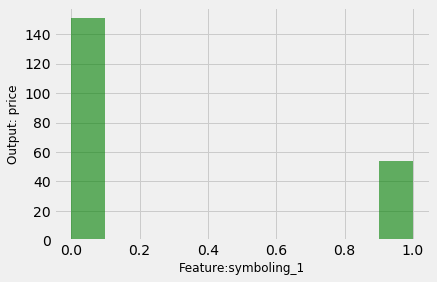

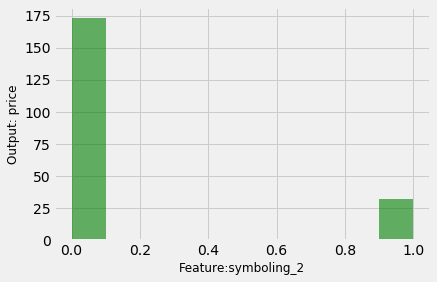

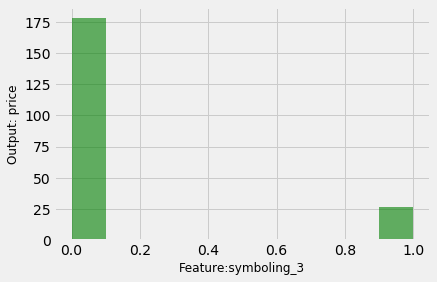

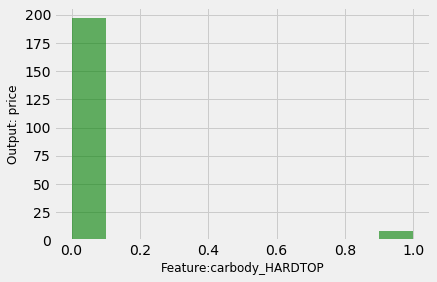

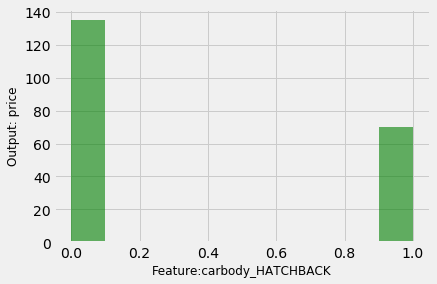

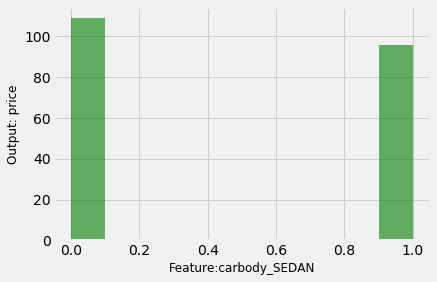

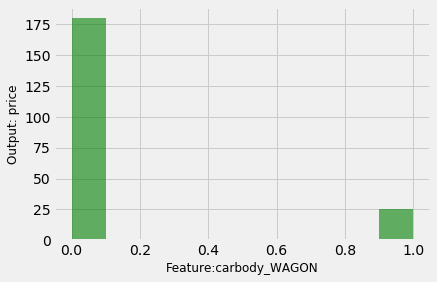

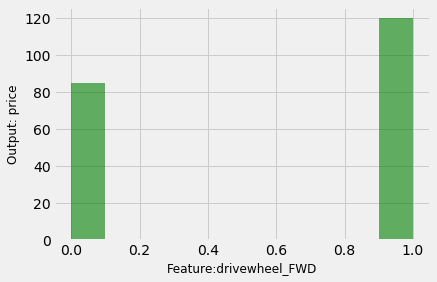

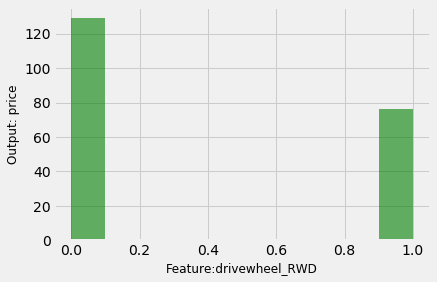

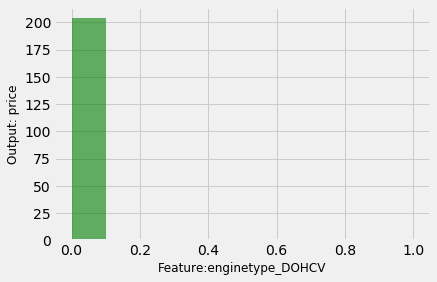

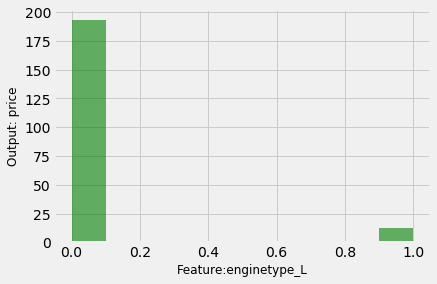

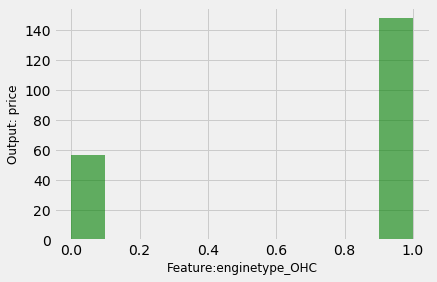

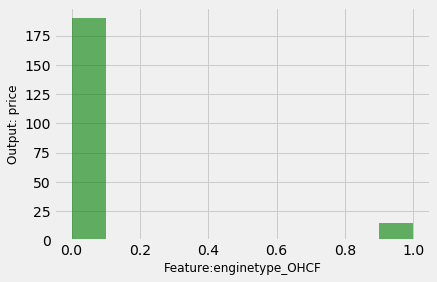

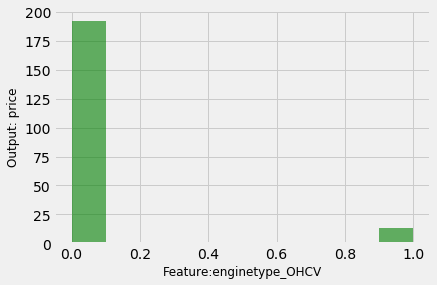

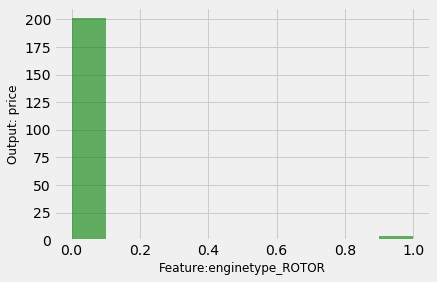

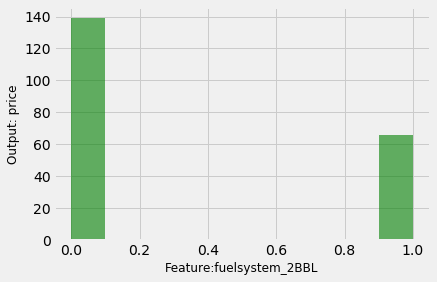

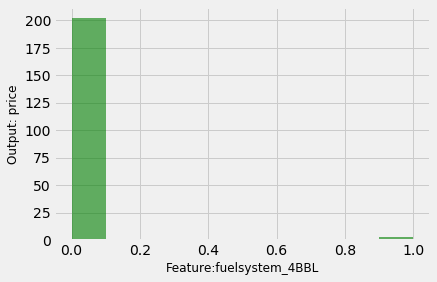

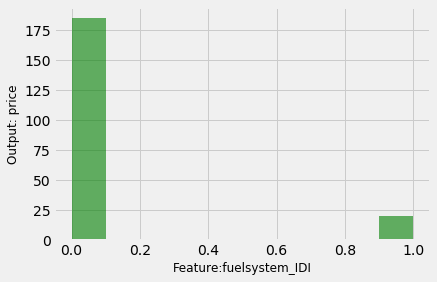

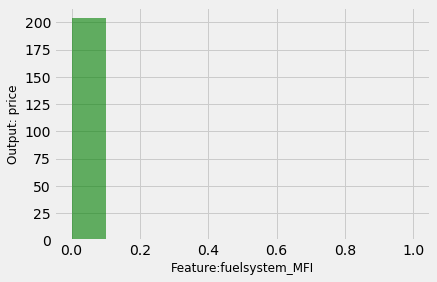

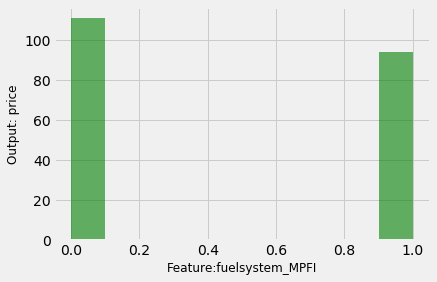

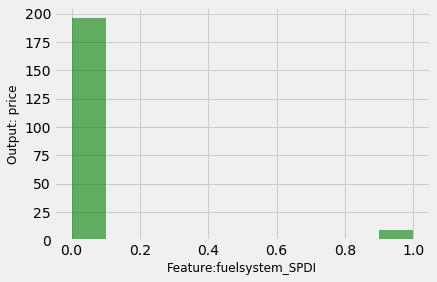

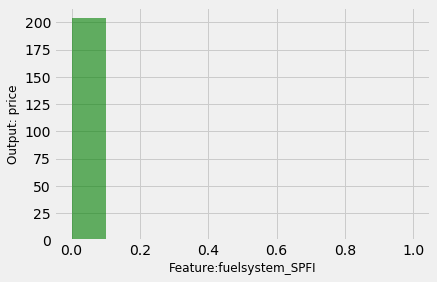

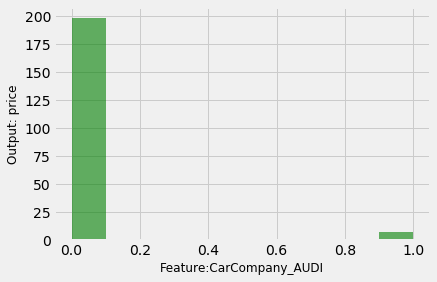

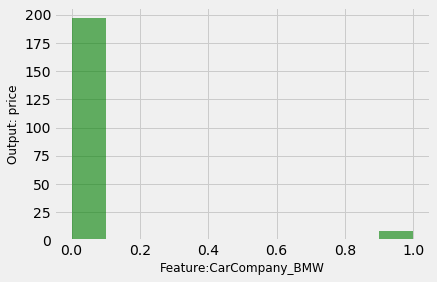

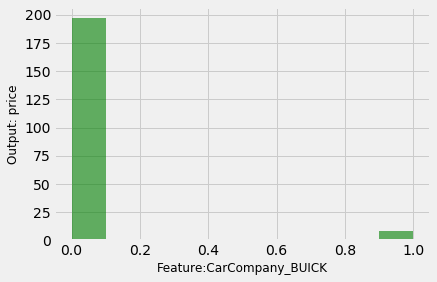

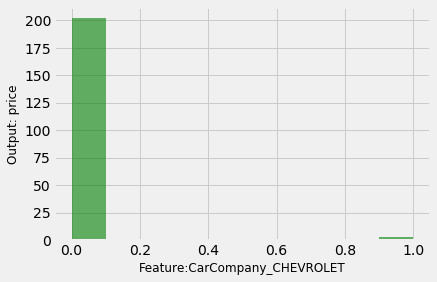

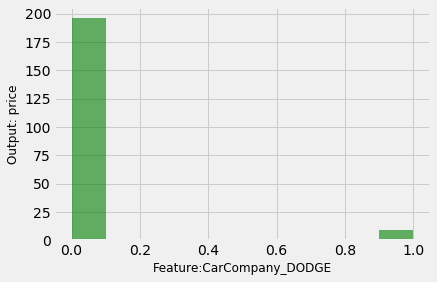

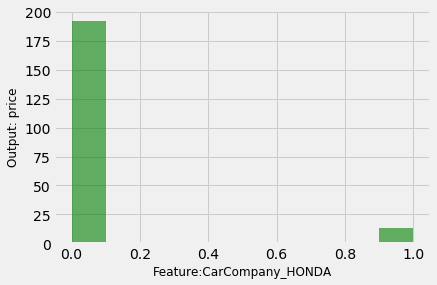

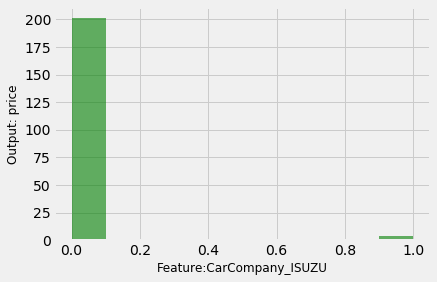

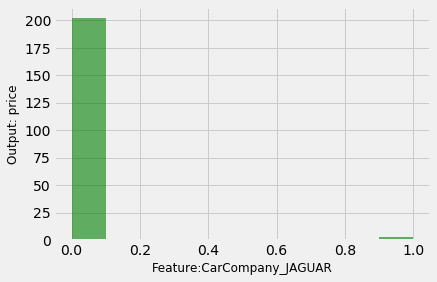

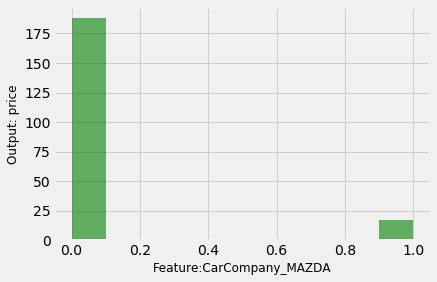

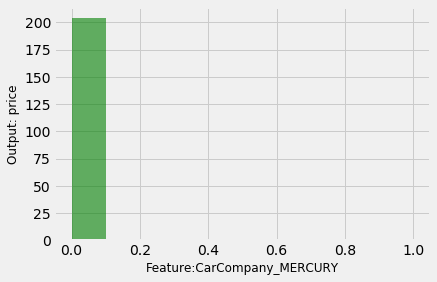

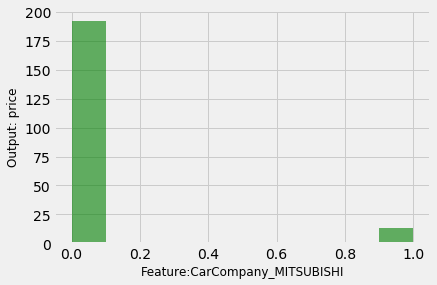

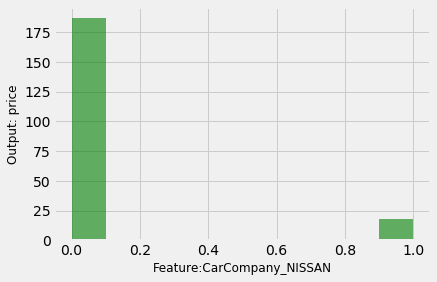

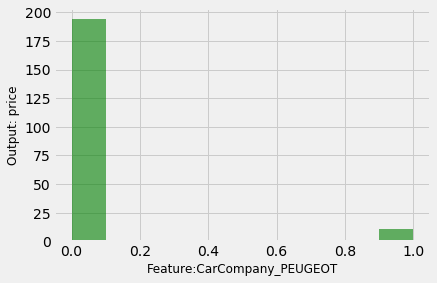

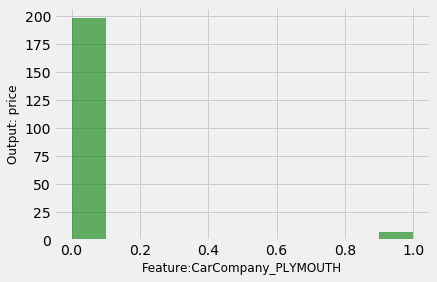

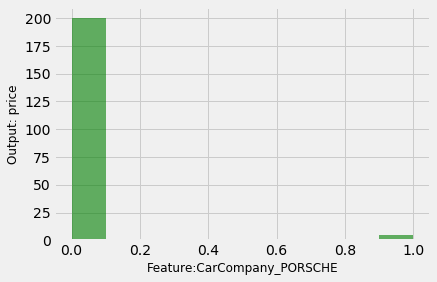

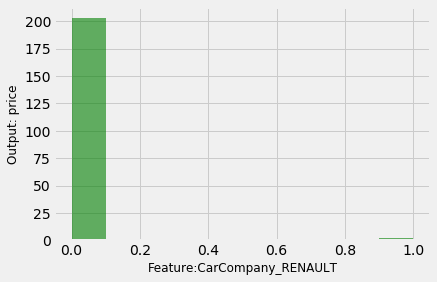

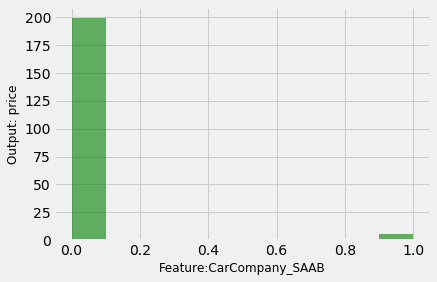

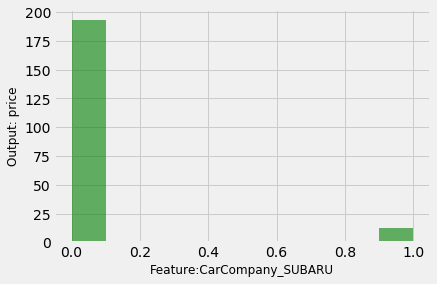

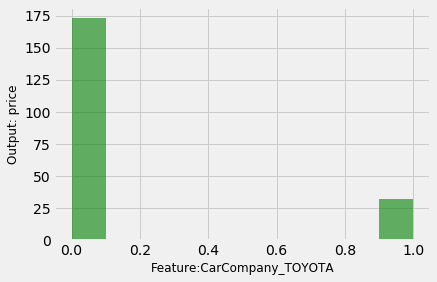

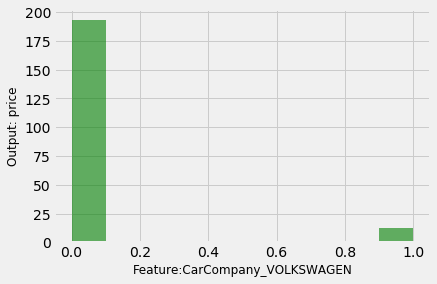

In [99]:
with plt.style.context(('fivethirtyeight')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: price',fontsize=12)
        plt.hist(df[col],alpha=0.6,facecolor='g')

In [0]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(cars_data['price'])
# Remove the labels from the features
# axis 1 refers to the columns
features= cars_data.drop('price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 100)

In [102]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (143, 68)
Training Labels Shape: (143,)
Testing Features Shape: (62, 68)
Testing Labels Shape: (62,)


In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [104]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'price.')

Mean Absolute Error: 1651.02 price.


In [105]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.75 %.


In [0]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [0]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [108]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: enginesize           Importance: 0.49
Variable: curbweight           Importance: 0.28
Variable: carwidth             Importance: 0.06
Variable: horsepower           Importance: 0.03
Variable: cylindernumber       Importance: 0.02
Variable: wheelbase            Importance: 0.01
Variable: carlength            Importance: 0.01
Variable: citympg              Importance: 0.01
Variable: highwaympg           Importance: 0.01
Variable: area_car             Importance: 0.01
Variable: weight_to_volume ratio Importance: 0.01
Variable: enginesize_to_powerratio Importance: 0.01
Variable: avg_milage           Importance: 0.01
Variable: CarCompany_BMW       Importance: 0.01
Variable: fueltype             Importance: 0.0
Variable: aspiration           Importance: 0.0
Variable: doornumber           Importance: 0.0
Variable: enginelocation       Importance: 0.0
Variable: carheight            Importance: 0.0
Variable: boreratio            Importance: 0.0
Variable: stroke               Importanc

In [109]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('enginesize'), feature_list.index('curbweight'),feature_list.index('highwaympg'),feature_list.index('horsepower'),feature_list.index('carlength'),
                     feature_list.index('carwidth'),feature_list.index('area_car'),feature_list.index('enginesize_to_powerratio'),feature_list.index('CarCompany_BMW')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error RF:', round(np.mean(errors), 2), 'price.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy RF:', round(accuracy, 2), '%.')

Mean Absolute Error RF: 1736.73 price.
Accuracy RF: 88.43 %.


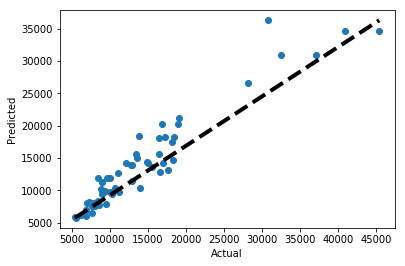

In [110]:
##ploting actual & predicted
fig,ax = plt.subplots()
ax.scatter(test_labels,predictions)
ax.plot([test_labels.min(), test_labels.max()], [predictions.min(), predictions.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
fig.show()

In [111]:
test_labels.shape

(62,)

In [112]:
predictions.shape

(62,)

Text(0, 0.5, 'Car Price')

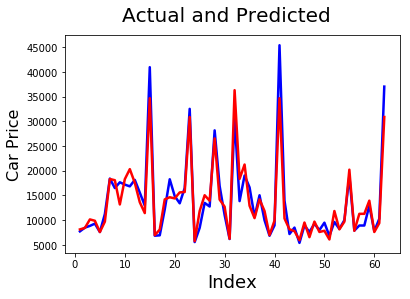

In [113]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)]
fig = plt.figure() 
plt.plot(c,test_labels, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,predictions, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

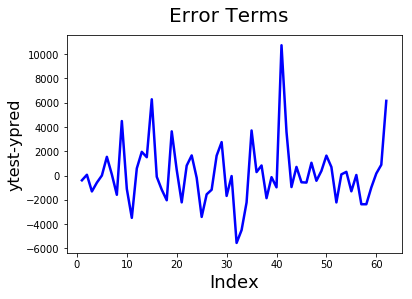

In [114]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,test_labels-predictions, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)  

Text(0, 0.5, 'Index')

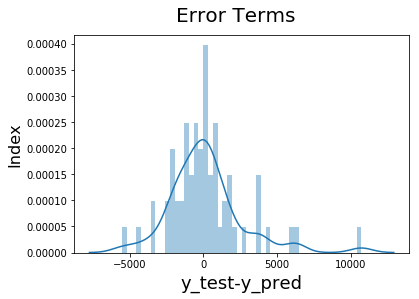

In [115]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((test_labels-predictions),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label